In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
import math
import collections
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import keras.backend as K 
from tensorflow.python.ops import math_ops


In [ ]:

import glob

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Reshape
from keras.utils import to_categorical
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.layers import Dropout, InputLayer, LSTM
from keras.layers import Bidirectional, BatchNormalization
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout, UpSampling1D, AveragePooling1D

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/ALDA_final_project/creditcard.csv')
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')


<Axes: >

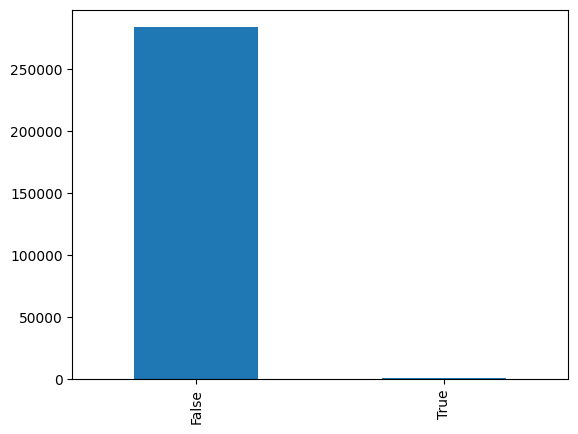

In [ ]:
data.duplicated().value_counts().plot.bar()

In [ ]:
data.drop_duplicates(inplace=True)

<Axes: >

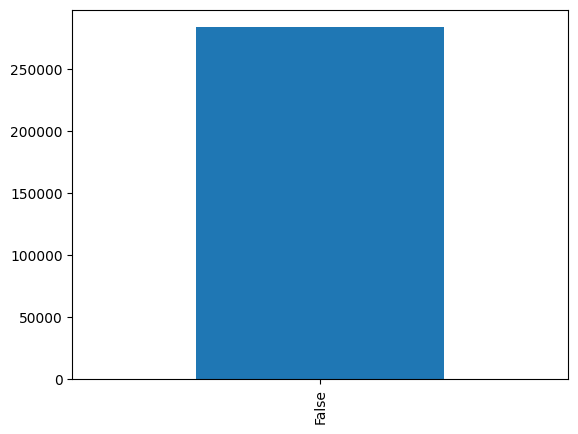

In [ ]:
data.duplicated().value_counts().plot.bar()

In [ ]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


splitting into dependent and independent variables

In [ ]:
X=data.drop(columns=['Class','Time'])
y=pd.DataFrame(data.Class, columns=['Class'])

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
X_t,X_test,y_t,y_test = train_test_split(X,y, random_state=0,test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_t,y_t, random_state=0,test_size=0.2)

In [ ]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
208634,2.109692,-0.282658,-1.601397,0.157529,0.253428,-0.420871,-0.048509,-0.050893,0.957046,0.136783,...,-0.314604,-0.368694,-1.102181,0.307043,-0.037267,-0.266569,0.215793,-0.094362,-0.064597,8.98
39245,1.053748,0.013416,0.069223,0.626361,-0.335350,-1.013352,0.422449,-0.186552,-0.425044,0.099097,...,0.045924,-0.266699,-1.056257,0.083267,0.510509,0.205813,-0.005070,-0.078369,0.017176,93.13
47254,-0.989392,1.293318,1.115086,-0.717161,0.590306,-0.084739,0.713956,0.084723,-0.478270,-0.299138,...,0.004422,-0.112918,-0.418050,-0.032361,-0.354185,-0.411338,-0.086474,-0.079769,0.190587,3.58
124587,-0.988540,-0.461739,1.980627,0.905616,0.283450,-0.722550,-0.297916,0.083711,0.102661,-0.427991,...,0.444744,0.307675,0.798343,0.128419,0.485237,-0.360081,0.499079,0.118564,0.186870,59.90
138934,-0.802157,1.247812,1.179001,1.261785,-0.222228,0.229187,0.170057,0.680090,-0.703300,-0.157482,...,0.018610,0.070837,0.389977,-0.072526,0.240541,-0.130200,-0.250525,0.297960,0.133787,14.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185987,2.001189,-0.094733,-1.090200,0.570819,-0.432203,-1.822925,0.340360,-0.516663,0.382659,0.112765,...,-0.192362,0.404687,1.402467,-0.014434,1.064466,0.234796,0.948717,-0.092840,-0.066925,17.90
223202,0.447240,1.334847,-3.029222,0.366486,3.793179,3.010099,0.698789,0.616111,-1.183914,-0.910841,...,0.320015,0.084315,0.453962,-0.231124,0.566220,-0.634618,1.042536,0.248615,0.270882,0.76
102753,-0.974941,0.689634,0.823912,-0.923401,1.579553,-1.074996,1.055522,-0.094849,-0.588977,-1.303515,...,-0.111182,-0.015863,-0.115064,-0.247861,-0.141180,0.127222,0.032042,-0.156552,-0.103905,0.76
49577,0.915184,-0.439310,0.985385,1.309120,-0.886112,0.363668,-0.572176,0.353048,0.709260,-0.042226,...,-0.094166,0.214717,0.606470,-0.151048,0.232794,0.444971,-0.220120,0.048760,0.029466,89.00


##Neural network without oversampling

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_norm= scaler.transform(X_train)
X_val_norm  = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [ ]:
METRICS = [ 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [ ]:
def visualize_results(y_true,y_pred):
  print(classification_report(y_true,y_pred))
  ConfusionMatrixDisplay.from_predictions(y_true,y_pred)

In [ ]:
def create_weighted_binary_crossentropy(zero_weight, one_weight):

    def weighted_binary_crossentropy(y_true, y_pred):

        b_ce = K.binary_crossentropy(from_logits=True)(y_pred,y_true)

        # Apply the weights
        print('error 3')
        weight_vector = y_true * one_weight + (1. - y_true) * zero_weight
        weighted_b_ce = weight_vector * b_ce
        print('error 4')
        # Return the mean error
        return K.mean(weighted_b_ce)

    return weighted_binary_crossentropy


#CNN

In [ ]:


def create_cnn():
  model = Sequential()
  #model.add(Dense(32, activation='relu', input_dim=29))
  model.add(Conv1D(128, 3, activation='relu', padding ='same', input_shape=(29,1)))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='Adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=METRICS)
  return model





In [ ]:
cnn=create_cnn()
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 29, 128)           512       
                                                                 
 dropout_1 (Dropout)         (None, 29, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 3712)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3713      
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.fit(X_train_norm,y_train, batch_size=2048, epochs=50, verbose=1, validation_data=(X_val_norm,y_val))

Epoch 1/50


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 0.0964 - accuracy: 0.9929 - precision: 0.0309 - recall: 0.1057 - auc: 0.4212 - prc: 0.1015

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0929 - accuracy: 0.9931 - precision: 0.0309 - recall: 0.1010 - auc: 0.4165 - prc: 0.0971 - val_loss: 0.0201 - val_accuracy: 0.9986 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3264 - val_prc: 9.2589e-04
Epoch 2/50
89/89 [==============================] - 1s 11ms/step - loss: 0.0143 - accuracy: 0.9984 - precision: 0.7778 - recall: 0.1084 - auc: 0.6669 - prc: 0.3297 - val_loss: 0.0066 - val_accuracy: 0.9991 - val_precision: 0.8889 - val_recall: 0.3810 - val_auc: 0.8772 - val_prc: 0.6367
Epoch 3/50
89/89 [==============================] - 1s 11ms/step - loss: 0.0069 - accuracy: 0.9990 - precision: 0.8656 - recall: 0.4985 - auc: 0.8779 - prc: 0.6264 - val_loss: 0.0050 - val_accuracy: 0.9992 - val_precision: 0.8250 - val_recall: 0.5238 - val_auc: 0.8807 - val_prc: 0.6396
Epoch 4/50
89/89 [==============================] - 1s 11ms/step - loss: 0.0058 - accuracy: 0.9992 - precision: 0.8771 - recall: 0.6409 - 

In [ ]:
cnn_test_preds= cnn.predict(X_test_norm)
cnn_val_preds = cnn.predict(X_val_norm)

1419/1419 [==============================] - 3s 2ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.81      0.76      0.79        63

    accuracy                           1.00     45396
   macro avg       0.91      0.88      0.89     45396
weighted avg       1.00      1.00      1.00     45396



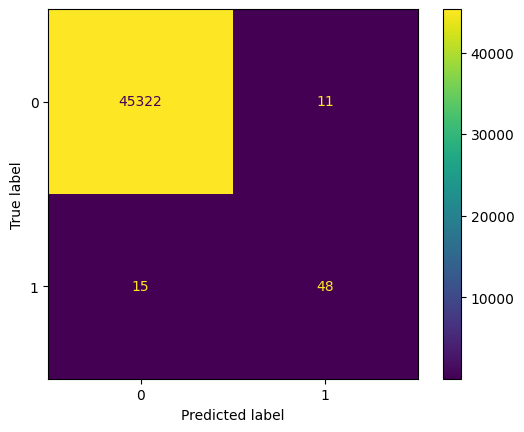

In [ ]:
visualize_results(y_val, cnn_val_preds>0.5)

Results with Adam lr=0.001

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.90      0.60      0.72        63

    accuracy                           1.00     45396
   macro avg       0.95      0.80      0.86     45396
weighted avg       1.00      1.00      1.00     45396



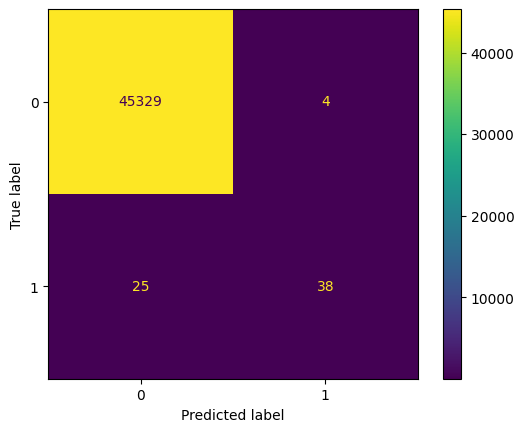

In [ ]:
visualize_results(y_val, cnn_val_preds>0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.87      0.60      0.71        87

    accuracy                           1.00     56746
   macro avg       0.93      0.80      0.85     56746
weighted avg       1.00      1.00      1.00     56746



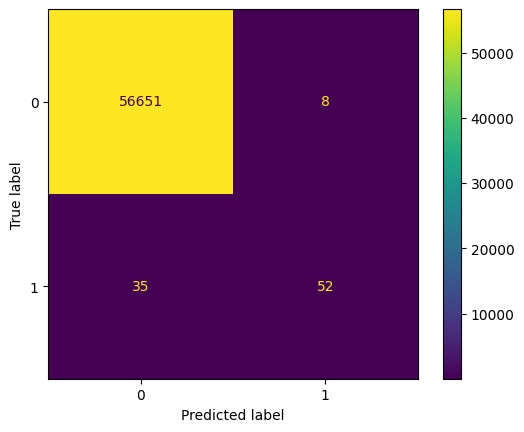

In [ ]:
visualize_results(y_test, cnn_test_preds>0.5)

Results with RMSPROP

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.82      0.78      0.80        63

    accuracy                           1.00     45396
   macro avg       0.91      0.89      0.90     45396
weighted avg       1.00      1.00      1.00     45396



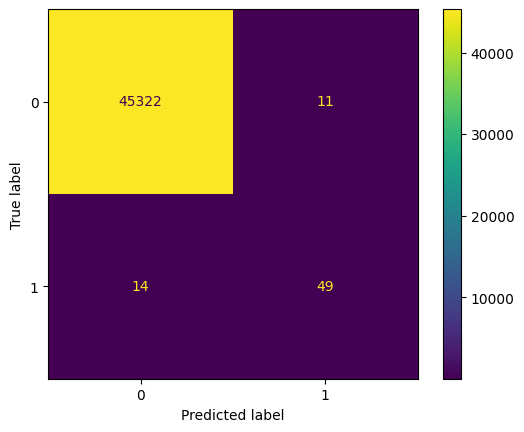

In [ ]:
visualize_results(y_val, cnn_val_preds>0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.80      0.77      0.78        87

    accuracy                           1.00     56746
   macro avg       0.90      0.88      0.89     56746
weighted avg       1.00      1.00      1.00     56746



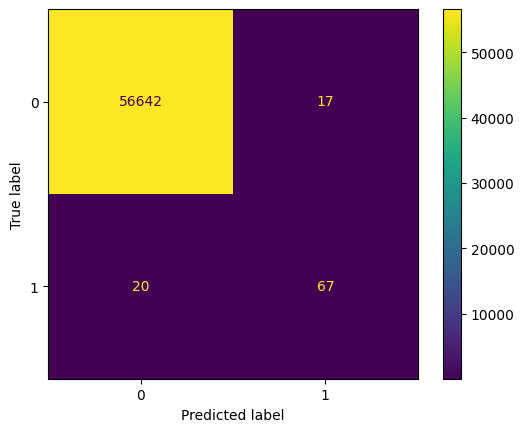

In [ ]:
visualize_results(y_test, cnn_test_preds>0.5)

#ANN model

In [ ]:
def create_dnn():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=29))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=METRICS)
  return model                              

In [ ]:
dnn_model=create_dnn()
dnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                960       
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn_model.fit(X_train_norm,y_train, batch_size=2048, epochs=15, verbose =1, validation_data=(X_val_norm,y_val))

Epoch 1/15
89/89 [==============================] - 2s 11ms/step - loss: 0.2749 - accuracy: 0.7755 - precision: 0.0051 - recall: 0.6762 - auc: 0.6822 - prc: 0.0030 - val_loss: 0.1115 - val_accuracy: 0.9990 - val_precision: 0.8696 - val_recall: 0.3175 - val_auc: 0.8416 - val_prc: 0.5069
Epoch 2/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0573 - accuracy: 0.9989 - precision: 0.8606 - recall: 0.4396 - auc: 0.8138 - prc: 0.5233 - val_loss: 0.0228 - val_accuracy: 0.9991 - val_precision: 0.8846 - val_recall: 0.3651 - val_auc: 0.8718 - val_prc: 0.6095
Epoch 3/15
89/89 [==============================] - 1s 7ms/step - loss: 0.0134 - accuracy: 0.9991 - precision: 0.8905 - recall: 0.5789 - auc: 0.8716 - prc: 0.6695 - val_loss: 0.0067 - val_accuracy: 0.9993 - val_precision: 0.8222 - val_recall: 0.5873 - val_auc: 0.9052 - val_prc: 0.6686
Epoch 4/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0058 - accuracy: 0.9993 - precision: 0.8980 - recall: 0.6811 - auc:

In [ ]:
dense_test_preds= dnn_model.predict(X_test_norm)
dense_val_preds = dnn_model.predict(X_val_norm)

1419/1419 [==============================] - 2s 1ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.85      0.70      0.77        63

    accuracy                           1.00     45396
   macro avg       0.92      0.85      0.88     45396
weighted avg       1.00      1.00      1.00     45396



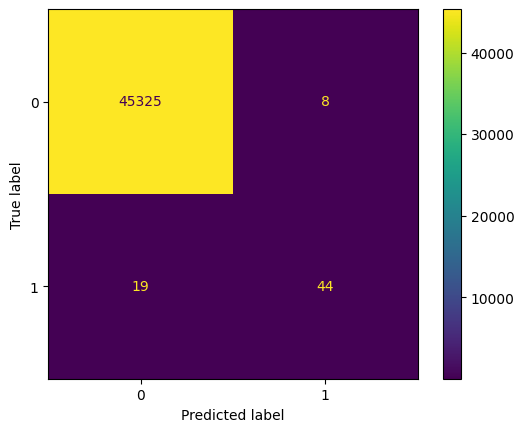

In [ ]:
visualize_results(y_val, dense_val_preds>0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.81      0.68      0.74        87

    accuracy                           1.00     56746
   macro avg       0.90      0.84      0.87     56746
weighted avg       1.00      1.00      1.00     56746



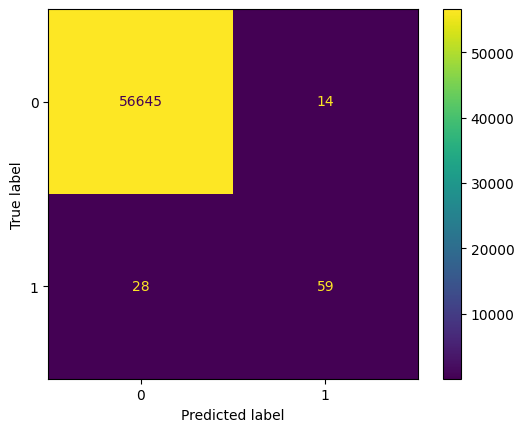

In [ ]:
visualize_results(y_test,dense_test_preds>0.5)

##Weighted loss function

#custom loss cnn

In [ ]:
import tensorflow as tf

def create_cnn_cust():
  model = Sequential()
  #model.add(Dense(32, activation='relu', input_dim=29))
  model.add(Conv1D(128, 3, activation='relu', padding ='same', input_shape=(29,1)))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=METRICS)
  return model





In [ ]:
cnn_cust=create_cnn_cust()
cnn_cust.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 128)           512       
                                                                 
 dropout_4 (Dropout)         (None, 29, 128)           0         
                                                                 
 flatten_4 (Flatten)         (None, 3712)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 3713      
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
w=0.02
validation_preds=[]
while(w<=0.2): 
  print("******************************for w = ",w)
  cnn_cust=create_cnn_cust()
  cnn_cust.summary()
  cnn_cust.fit(X_train_norm,y_train, batch_size=2048,epochs=20, verbose=1, validation_data=(X_val_norm,y_val), class_weight={0: w, 1: 1-w})
  cnn_cust_val_preds = cnn_cust.predict(X_val_norm)>0.5
  #cnn_cust_test_preds= cnn_cust.predict(X_test_norm)>0.5
  validation_preds.append(cnn_cust_val_preds)
  w+=0.01
  

******************************for w =  0.02
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 29, 128)           512       
                                                                 
 dropout_16 (Dropout)        (None, 29, 128)           0         
                                                                 
 flatten_16 (Flatten)        (None, 3712)              0         
                                                                 
 dense_16 (Dense)            (None, 1)                 3713      
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9970 - precision: 0.3289 - recall: 0.7124 - auc: 0.9179 - prc: 0.6270

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0034 - accuracy: 0.9970 - precision: 0.3289 - recall: 0.7124 - auc: 0.9179 - prc: 0.6270 - val_loss: 0.0201 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9623 - val_prc: 0.7098
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9993 - precision: 0.7882 - recall: 0.8297 - auc: 0.9563 - prc: 0.7634 - val_loss: 0.0218 - val_accuracy: 0.9988 - val_precision: 0.5361 - val_recall: 0.8254 - val_auc: 0.9697 - val_prc: 0.7169
Epoch 3/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0012 - accuracy: 0.9989 - precision: 0.6570 - recall: 0.8421 - auc: 0.9779 - prc: 0.7615 - val_loss: 0.0139 - val_accuracy: 0.9989 - val_precision: 0.5667 - val_recall: 0.8095 - val_auc: 0.9763 - val_prc: 0.7527
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 0.9986 - precision: 0.5774 - recall: 0.8545 - auc: 0.9819 -

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 0.0052 - accuracy: 0.9916 - precision: 0.1212 - recall: 0.6393 - auc: 0.8887 - prc: 0.5487

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0051 - accuracy: 0.9919 - precision: 0.1280 - recall: 0.6451 - auc: 0.8894 - prc: 0.5561 - val_loss: 0.0177 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9569 - val_prc: 0.6904
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9993 - precision: 0.8080 - recall: 0.8080 - auc: 0.9522 - prc: 0.7363 - val_loss: 0.0209 - val_accuracy: 0.9991 - val_precision: 0.6375 - val_recall: 0.8095 - val_auc: 0.9643 - val_prc: 0.7166
Epoch 3/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0014 - accuracy: 0.9992 - precision: 0.7389 - recall: 0.8235 - auc: 0.9713 - prc: 0.7585 - val_loss: 0.0105 - val_accuracy: 0.9992 - val_precision: 0.6800 - val_recall: 0.8095 - val_auc: 0.9711 - val_prc: 0.7340
Epoch 4/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0013 - accuracy: 0.9989 - precision: 0.6485 - recall: 0.8452 - auc: 0.9768 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9910 - precision: 0.1090 - recall: 0.5984 - auc: 0.8650 - prc: 0.5130

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0062 - accuracy: 0.9910 - precision: 0.1090 - recall: 0.5984 - auc: 0.8650 - prc: 0.5130 - val_loss: 0.0160 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9536 - val_prc: 0.6772
Epoch 2/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.9994 - precision: 0.8371 - recall: 0.7957 - auc: 0.9470 - prc: 0.7396 - val_loss: 0.0102 - val_accuracy: 0.9994 - val_precision: 0.7500 - val_recall: 0.8095 - val_auc: 0.9694 - val_prc: 0.7158
Epoch 3/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 0.9993 - precision: 0.7811 - recall: 0.8173 - auc: 0.9656 - prc: 0.7615 - val_loss: 0.0111 - val_accuracy: 0.9992 - val_precision: 0.6711 - val_recall: 0.8095 - val_auc: 0.9775 - val_prc: 0.7227
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0015 - accuracy: 0.9991 - precision: 0.7120 - recall: 0.8266 - auc: 0.9754 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 0.0068 - accuracy: 0.9915 - precision: 0.1196 - recall: 0.6263 - auc: 0.8916 - prc: 0.5137

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 18ms/step - loss: 0.0066 - accuracy: 0.9916 - precision: 0.1217 - recall: 0.6295 - auc: 0.8937 - prc: 0.5155 - val_loss: 0.0137 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9588 - val_prc: 0.6828
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8339 - recall: 0.7926 - auc: 0.9442 - prc: 0.7400 - val_loss: 0.0126 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9657 - val_prc: 0.7096
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9993 - precision: 0.7853 - recall: 0.8266 - auc: 0.9618 - prc: 0.7569 - val_loss: 0.0093 - val_accuracy: 0.9992 - val_precision: 0.6892 - val_recall: 0.8095 - val_auc: 0.9732 - val_prc: 0.7490
Epoch 4/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0015 - accuracy: 0.9992 - precision: 0.7479 - recall: 0.8266 - auc: 0.9744 -

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0088 - accuracy: 0.9872 - precision: 0.0722 - recall: 0.5568 - auc: 0.8494 - prc: 0.4332

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 17ms/step - loss: 0.0085 - accuracy: 0.9876 - precision: 0.0761 - recall: 0.5648 - auc: 0.8498 - prc: 0.4442 - val_loss: 0.0134 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9389 - val_prc: 0.6627
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0021 - accuracy: 0.9994 - precision: 0.8433 - recall: 0.7833 - auc: 0.9414 - prc: 0.7292 - val_loss: 0.0098 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9617 - val_prc: 0.7170
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0018 - accuracy: 0.9993 - precision: 0.8006 - recall: 0.8080 - auc: 0.9626 - prc: 0.7487 - val_loss: 0.0077 - val_accuracy: 0.9993 - val_precision: 0.7286 - val_recall: 0.8095 - val_auc: 0.9681 - val_prc: 0.7475
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0016 - accuracy: 0.9993 - precision: 0.7739 - recall: 0.8266 - auc: 0.9747 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9954 - precision: 0.1915 - recall: 0.5288 - auc: 0.8176 - prc: 0.4419

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0094 - accuracy: 0.9954 - precision: 0.1928 - recall: 0.5285 - auc: 0.8168 - prc: 0.4399 - val_loss: 0.0116 - val_accuracy: 0.9994 - val_precision: 0.8000 - val_recall: 0.7619 - val_auc: 0.9454 - val_prc: 0.6641
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 0.9994 - precision: 0.8508 - recall: 0.7771 - auc: 0.9361 - prc: 0.7286 - val_loss: 0.0100 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9695 - val_prc: 0.7210
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9993 - precision: 0.8062 - recall: 0.7988 - auc: 0.9576 - prc: 0.7578 - val_loss: 0.0096 - val_accuracy: 0.9992 - val_precision: 0.6892 - val_recall: 0.8095 - val_auc: 0.9662 - val_prc: 0.7254
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9993 - precision: 0.7958 - recall: 0.8204 - auc: 0.9633 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


83/89 [==========================>...] - ETA: 0s - loss: 0.0116 - accuracy: 0.9900 - precision: 0.0816 - recall: 0.4690 - auc: 0.7852 - prc: 0.4025

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0110 - accuracy: 0.9905 - precision: 0.0867 - recall: 0.4819 - auc: 0.7936 - prc: 0.4118 - val_loss: 0.0115 - val_accuracy: 0.9994 - val_precision: 0.7833 - val_recall: 0.7460 - val_auc: 0.9319 - val_prc: 0.6393
Epoch 2/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 0.9994 - precision: 0.8630 - recall: 0.7802 - auc: 0.9285 - prc: 0.7122 - val_loss: 0.0091 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9627 - val_prc: 0.7078
Epoch 3/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 0.9993 - precision: 0.8269 - recall: 0.7988 - auc: 0.9551 - prc: 0.7480 - val_loss: 0.0076 - val_accuracy: 0.9993 - val_precision: 0.7391 - val_recall: 0.8095 - val_auc: 0.9689 - val_prc: 0.7174
Epoch 4/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 0.9993 - precision: 0.8062 - recall: 0.8111 - auc: 0.9594 - p

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9944 - precision: 0.1489 - recall: 0.4845 - auc: 0.7832 - prc: 0.4107

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 22ms/step - loss: 0.0114 - accuracy: 0.9944 - precision: 0.1489 - recall: 0.4845 - auc: 0.7832 - prc: 0.4107 - val_loss: 0.0128 - val_accuracy: 0.9994 - val_precision: 0.7903 - val_recall: 0.7778 - val_auc: 0.9361 - val_prc: 0.6678
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0025 - accuracy: 0.9994 - precision: 0.8605 - recall: 0.7833 - auc: 0.9256 - prc: 0.7167 - val_loss: 0.0085 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9624 - val_prc: 0.7082
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0021 - accuracy: 0.9994 - precision: 0.8472 - recall: 0.7895 - auc: 0.9489 - prc: 0.7441 - val_loss: 0.0067 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9702 - val_prc: 0.7189
Epoch 4/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.9994 - precision: 0.8296 - recall: 0.7988 - auc: 0.9569 -

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 0.0131 - accuracy: 0.9939 - precision: 0.1292 - recall: 0.4558 - auc: 0.7375 - prc: 0.3817

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 19ms/step - loss: 0.0129 - accuracy: 0.9940 - precision: 0.1343 - recall: 0.4611 - auc: 0.7434 - prc: 0.3883 - val_loss: 0.0102 - val_accuracy: 0.9994 - val_precision: 0.7931 - val_recall: 0.7302 - val_auc: 0.9101 - val_prc: 0.6467
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.9994 - precision: 0.8576 - recall: 0.7647 - auc: 0.9234 - prc: 0.7108 - val_loss: 0.0086 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9691 - val_prc: 0.7046
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0021 - accuracy: 0.9994 - precision: 0.8472 - recall: 0.7895 - auc: 0.9495 - prc: 0.7430 - val_loss: 0.0068 - val_accuracy: 0.9994 - val_precision: 0.7692 - val_recall: 0.7937 - val_auc: 0.9703 - val_prc: 0.7161
Epoch 4/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.9994 - precision: 0.8382 - recall: 0.8019 - auc: 0.9567 -

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9918 - precision: 0.0869 - recall: 0.4063 - auc: 0.7294 - prc: 0.3625

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 17ms/step - loss: 0.0137 - accuracy: 0.9919 - precision: 0.0894 - recall: 0.4119 - auc: 0.7334 - prc: 0.3689 - val_loss: 0.0103 - val_accuracy: 0.9994 - val_precision: 0.7931 - val_recall: 0.7302 - val_auc: 0.9044 - val_prc: 0.6272
Epoch 2/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0027 - accuracy: 0.9994 - precision: 0.8636 - recall: 0.7647 - auc: 0.9176 - prc: 0.7059 - val_loss: 0.0075 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9553 - val_prc: 0.6849
Epoch 3/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8649 - recall: 0.7926 - auc: 0.9477 - prc: 0.7421 - val_loss: 0.0061 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9698 - val_prc: 0.7058
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9994 - precision: 0.8404 - recall: 0.7988 - auc: 0.9588 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0155 - accuracy: 0.9901 - precision: 0.0706 - recall: 0.4016 - auc: 0.7161 - prc: 0.3424

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0152 - accuracy: 0.9902 - precision: 0.0749 - recall: 0.4171 - auc: 0.7248 - prc: 0.3605 - val_loss: 0.0109 - val_accuracy: 0.9994 - val_precision: 0.8070 - val_recall: 0.7302 - val_auc: 0.9086 - val_prc: 0.6343
Epoch 2/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0029 - accuracy: 0.9993 - precision: 0.8669 - recall: 0.7461 - auc: 0.9098 - prc: 0.6951 - val_loss: 0.0088 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9594 - val_prc: 0.6909
Epoch 3/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0023 - accuracy: 0.9994 - precision: 0.8615 - recall: 0.7895 - auc: 0.9455 - prc: 0.7349 - val_loss: 0.0074 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9672 - val_prc: 0.7104
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0021 - accuracy: 0.9994 - precision: 0.8528 - recall: 0.7895 - auc: 0.9559 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9905 - precision: 0.0745 - recall: 0.4058 - auc: 0.7100 - prc: 0.3314

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0161 - accuracy: 0.9905 - precision: 0.0759 - recall: 0.4093 - auc: 0.7118 - prc: 0.3356 - val_loss: 0.0103 - val_accuracy: 0.9993 - val_precision: 0.7895 - val_recall: 0.7143 - val_auc: 0.9012 - val_prc: 0.6491
Epoch 2/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9993 - precision: 0.8628 - recall: 0.7399 - auc: 0.9119 - prc: 0.6918 - val_loss: 0.0081 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9609 - val_prc: 0.6957
Epoch 3/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.9994 - precision: 0.8664 - recall: 0.7833 - auc: 0.9444 - prc: 0.7337 - val_loss: 0.0053 - val_accuracy: 0.9994 - val_precision: 0.8033 - val_recall: 0.7778 - val_auc: 0.9700 - val_prc: 0.7331
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0021 - accuracy: 0.9994 - precision: 0.8678 - recall: 0.7926 - auc: 0.9524 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0169 - accuracy: 0.9925 - precision: 0.0911 - recall: 0.3780 - auc: 0.6879 - prc: 0.3031

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0164 - accuracy: 0.9928 - precision: 0.0963 - recall: 0.3886 - auc: 0.6934 - prc: 0.3104 - val_loss: 0.0100 - val_accuracy: 0.9994 - val_precision: 0.8182 - val_recall: 0.7143 - val_auc: 0.9071 - val_prc: 0.6263
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9993 - precision: 0.8686 - recall: 0.7368 - auc: 0.9105 - prc: 0.6931 - val_loss: 0.0078 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9545 - val_prc: 0.6886
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.9994 - precision: 0.8694 - recall: 0.7833 - auc: 0.9459 - prc: 0.7349 - val_loss: 0.0062 - val_accuracy: 0.9994 - val_precision: 0.8033 - val_recall: 0.7778 - val_auc: 0.9696 - val_prc: 0.7119
Epoch 4/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0021 - accuracy: 0.9994 - precision: 0.8664 - recall: 0.7833 - auc: 0.9546 -

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9939 - precision: 0.1054 - recall: 0.3456 - auc: 0.6588 - prc: 0.2868

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0176 - accuracy: 0.9940 - precision: 0.1089 - recall: 0.3523 - auc: 0.6648 - prc: 0.2941 - val_loss: 0.0104 - val_accuracy: 0.9993 - val_precision: 0.7925 - val_recall: 0.6667 - val_auc: 0.8870 - val_prc: 0.6405
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9993 - precision: 0.8664 - recall: 0.7430 - auc: 0.9001 - prc: 0.6873 - val_loss: 0.0064 - val_accuracy: 0.9994 - val_precision: 0.8136 - val_recall: 0.7619 - val_auc: 0.9522 - val_prc: 0.6688
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.9994 - precision: 0.8655 - recall: 0.7771 - auc: 0.9443 - prc: 0.7248 - val_loss: 0.0059 - val_accuracy: 0.9994 - val_precision: 0.8033 - val_recall: 0.7778 - val_auc: 0.9688 - val_prc: 0.7140
Epoch 4/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8789 - recall: 0.7864 - auc: 0.9540 -

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 0.0190 - accuracy: 0.9962 - precision: 0.1804 - recall: 0.3541 - auc: 0.6402 - prc: 0.3046

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0182 - accuracy: 0.9963 - precision: 0.1922 - recall: 0.3679 - auc: 0.6498 - prc: 0.3174 - val_loss: 0.0104 - val_accuracy: 0.9994 - val_precision: 0.8182 - val_recall: 0.7143 - val_auc: 0.8940 - val_prc: 0.6416
Epoch 2/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9993 - precision: 0.8655 - recall: 0.7368 - auc: 0.8980 - prc: 0.6844 - val_loss: 0.0074 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9543 - val_prc: 0.6867
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0025 - accuracy: 0.9994 - precision: 0.8720 - recall: 0.7802 - auc: 0.9440 - prc: 0.7238 - val_loss: 0.0054 - val_accuracy: 0.9994 - val_precision: 0.8167 - val_recall: 0.7778 - val_auc: 0.9626 - val_prc: 0.7316
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8803 - recall: 0.7740 - auc: 0.9515 -

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9978 - precision: 0.3455 - recall: 0.3420 - auc: 0.6499 - prc: 0.3059

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 24ms/step - loss: 0.0186 - accuracy: 0.9978 - precision: 0.3455 - recall: 0.3420 - auc: 0.6499 - prc: 0.3059 - val_loss: 0.0109 - val_accuracy: 0.9993 - val_precision: 0.7963 - val_recall: 0.6825 - val_auc: 0.9040 - val_prc: 0.6424
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9993 - precision: 0.8681 - recall: 0.7337 - auc: 0.8882 - prc: 0.6787 - val_loss: 0.0062 - val_accuracy: 0.9994 - val_precision: 0.7869 - val_recall: 0.7619 - val_auc: 0.9483 - val_prc: 0.6728
Epoch 3/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.9994 - precision: 0.8799 - recall: 0.7709 - auc: 0.9386 - prc: 0.7194 - val_loss: 0.0050 - val_accuracy: 0.9994 - val_precision: 0.8167 - val_recall: 0.7778 - val_auc: 0.9632 - val_prc: 0.7278
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8838 - recall: 0.7771 - auc: 0.9499 -

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9944 - precision: 0.1038 - recall: 0.3005 - auc: 0.6170 - prc: 0.2560

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 19ms/step - loss: 0.0204 - accuracy: 0.9944 - precision: 0.1038 - recall: 0.3005 - auc: 0.6170 - prc: 0.2560 - val_loss: 0.0100 - val_accuracy: 0.9993 - val_precision: 0.8298 - val_recall: 0.6190 - val_auc: 0.8773 - val_prc: 0.6572
Epoch 2/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0033 - accuracy: 0.9993 - precision: 0.8755 - recall: 0.7183 - auc: 0.8933 - prc: 0.6747 - val_loss: 0.0056 - val_accuracy: 0.9994 - val_precision: 0.8246 - val_recall: 0.7460 - val_auc: 0.9347 - val_prc: 0.6840
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.9994 - precision: 0.8813 - recall: 0.7585 - auc: 0.9396 - prc: 0.7072 - val_loss: 0.0054 - val_accuracy: 0.9994 - val_precision: 0.8033 - val_recall: 0.7778 - val_auc: 0.9615 - val_prc: 0.7264
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 0.9994 - precision: 0.8780 - recall: 0.7802 - auc: 0.9514 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9928 - precision: 0.0779 - recall: 0.3005 - auc: 0.6307 - prc: 0.2678

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0208 - accuracy: 0.9928 - precision: 0.0779 - recall: 0.3005 - auc: 0.6307 - prc: 0.2678 - val_loss: 0.0112 - val_accuracy: 0.9993 - val_precision: 0.8163 - val_recall: 0.6349 - val_auc: 0.8744 - val_prc: 0.6373
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9993 - precision: 0.8783 - recall: 0.7152 - auc: 0.8870 - prc: 0.6713 - val_loss: 0.0066 - val_accuracy: 0.9994 - val_precision: 0.7833 - val_recall: 0.7460 - val_auc: 0.9438 - val_prc: 0.6665
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 0.9994 - precision: 0.8781 - recall: 0.7585 - auc: 0.9413 - prc: 0.7099 - val_loss: 0.0056 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9628 - val_prc: 0.7010
Epoch 4/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0023 - accuracy: 0.9994 - precision: 0.8838 - recall: 0.7771 - auc: 0.9488 

Classification Report for various weight distributions

In [ ]:
for i in range(len(validation_preds)):
  print("CLASSIFICATION REPORT FOR W=", 0.01 +i*(0.01))
  print(classification_report(y_val, validation_preds[i]))

CLASSIFICATION REPORT FOR W= 0.01
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.46      0.81      0.58        63

    accuracy                           1.00     45396
   macro avg       0.73      0.90      0.79     45396
weighted avg       1.00      1.00      1.00     45396

CLASSIFICATION REPORT FOR W= 0.02
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.44      0.83      0.57        63

    accuracy                           1.00     45396
   macro avg       0.72      0.91      0.79     45396
weighted avg       1.00      1.00      1.00     45396

CLASSIFICATION REPORT FOR W= 0.03
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.47      0.84      0.60        63

    accuracy                           1.00     45396
   macro avg       0.73   

In [ ]:
cnn_cust_val_preds = cnn_cust.predict(X_val_norm)>0.5
cnn_cust_test_preds= cnn_cust.predict(X_test_norm)>0.5

1774/1774 [==============================] - 3s 2ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.71      0.79      0.75        63

    accuracy                           1.00     45396
   macro avg       0.86      0.90      0.88     45396
weighted avg       1.00      1.00      1.00     45396



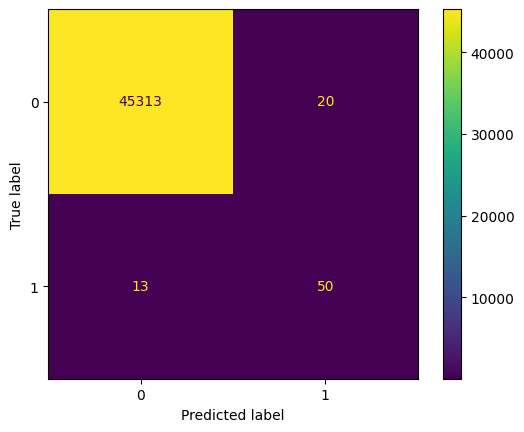

In [ ]:
visualize_results(y_val,cnn_cust_val_preds)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.68      0.78      0.73        87

    accuracy                           1.00     56746
   macro avg       0.84      0.89      0.86     56746
weighted avg       1.00      1.00      1.00     56746



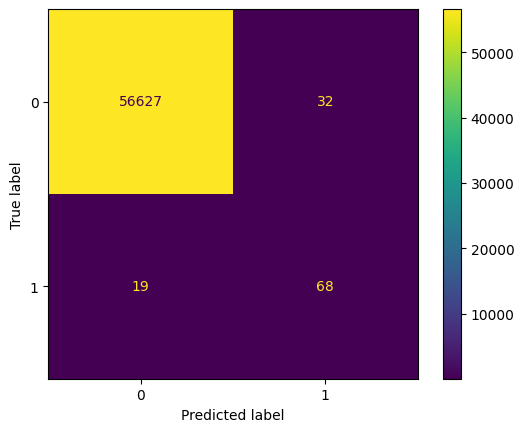

In [ ]:
visualize_results(y_test,cnn_cust_test_preds)

cnn + rmsprop + weighted loss

In [ ]:
w=0.02
validation_preds_rms=[]
while(w<=0.2): 
  print("******************************for w = ",w)
  cnn_cust=create_cnn_cust()
  cnn_cust.summary()
  cnn_cust.fit(X_train_norm,y_train, batch_size=2048,epochs=20, verbose=1, validation_data=(X_val_norm,y_val), class_weight={0: w, 1: 1-w})
  cnn_cust_val_preds = cnn_cust.predict(X_val_norm)>0.5
  #cnn_cust_test_preds= cnn_cust.predict(X_test_norm)>0.5
  validation_preds_rms.append(cnn_cust_val_preds)
  w+=0.01

******************************for w =  0.02
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 128)           512       
                                                                 
 dropout (Dropout)           (None, 29, 128)           0         
                                                                 
 flatten (Flatten)           (None, 3712)              0         
                                                                 
 dense (Dense)               (None, 1)                 3713      
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9928 - precision: 0.1583 - recall: 0.6997 - auc: 0.8947 - prc: 0.5722

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 11s 16ms/step - loss: 0.0042 - accuracy: 0.9928 - precision: 0.1583 - recall: 0.6997 - auc: 0.8947 - prc: 0.5722 - val_loss: 0.0363 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9621 - val_prc: 0.6986
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0016 - accuracy: 0.9993 - precision: 0.8069 - recall: 0.8019 - auc: 0.9445 - prc: 0.7406 - val_loss: 0.0232 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9634 - val_prc: 0.7198
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9992 - precision: 0.7642 - recall: 0.8328 - auc: 0.9615 - prc: 0.7511 - val_loss: 0.0228 - val_accuracy: 0.9991 - val_precision: 0.6265 - val_recall: 0.8254 - val_auc: 0.9716 - val_prc: 0.7097
Epoch 4/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0013 - accuracy: 0.9991 - precision: 0.7139 - recall: 0.8421 - auc: 0.9714

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9948 - precision: 0.1931 - recall: 0.6544 - auc: 0.9056 - prc: 0.5427

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 7s 18ms/step - loss: 0.0049 - accuracy: 0.9949 - precision: 0.1969 - recall: 0.6580 - auc: 0.9069 - prc: 0.5499 - val_loss: 0.0209 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9539 - val_prc: 0.6974
Epoch 2/20
89/89 [==============================] - 1s 13ms/step - loss: 0.0018 - accuracy: 0.9993 - precision: 0.8199 - recall: 0.7895 - auc: 0.9490 - prc: 0.7363 - val_loss: 0.0181 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9636 - val_prc: 0.7154
Epoch 3/20
89/89 [==============================] - 2s 19ms/step - loss: 0.0015 - accuracy: 0.9992 - precision: 0.7536 - recall: 0.8142 - auc: 0.9639 - prc: 0.7576 - val_loss: 0.0154 - val_accuracy: 0.9991 - val_precision: 0.6375 - val_recall: 0.8095 - val_auc: 0.9661 - val_prc: 0.7210
Epoch 4/20
89/89 [==============================] - 2s 18ms/step - loss: 0.0014 - accuracy: 0.9991 - precision: 0.7236 - recall: 0.8266 - auc: 0.9715 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9948 - precision: 0.1983 - recall: 0.6702 - auc: 0.9039 - prc: 0.5457

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 5s 39ms/step - loss: 0.0056 - accuracy: 0.9949 - precision: 0.2002 - recall: 0.6710 - auc: 0.9042 - prc: 0.5485 - val_loss: 0.0178 - val_accuracy: 0.9994 - val_precision: 0.8033 - val_recall: 0.7778 - val_auc: 0.9577 - val_prc: 0.6741
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9994 - precision: 0.8528 - recall: 0.7895 - auc: 0.9477 - prc: 0.7395 - val_loss: 0.0107 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9662 - val_prc: 0.7100
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9993 - precision: 0.7821 - recall: 0.8111 - auc: 0.9600 - prc: 0.7518 - val_loss: 0.0111 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9686 - val_prc: 0.7180
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0016 - accuracy: 0.9992 - precision: 0.7659 - recall: 0.8204 - auc: 0.9681 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9932 - precision: 0.1464 - recall: 0.6257 - auc: 0.8838 - prc: 0.5335

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 17ms/step - loss: 0.0065 - accuracy: 0.9932 - precision: 0.1479 - recall: 0.6269 - auc: 0.8846 - prc: 0.5365 - val_loss: 0.0148 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9580 - val_prc: 0.6878
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8505 - recall: 0.7926 - auc: 0.9402 - prc: 0.7420 - val_loss: 0.0097 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9687 - val_prc: 0.7163
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0018 - accuracy: 0.9993 - precision: 0.7892 - recall: 0.8111 - auc: 0.9583 - prc: 0.7516 - val_loss: 0.0110 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9695 - val_prc: 0.7078
Epoch 4/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 0.9992 - precision: 0.7615 - recall: 0.8204 - auc: 0.9697 -

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 0.0075 - accuracy: 0.9924 - precision: 0.1255 - recall: 0.5829 - auc: 0.8637 - prc: 0.4761

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0073 - accuracy: 0.9926 - precision: 0.1304 - recall: 0.5907 - auc: 0.8675 - prc: 0.4838 - val_loss: 0.0124 - val_accuracy: 0.9994 - val_precision: 0.7903 - val_recall: 0.7778 - val_auc: 0.9524 - val_prc: 0.6650
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8557 - recall: 0.7895 - auc: 0.9434 - prc: 0.7354 - val_loss: 0.0115 - val_accuracy: 0.9993 - val_precision: 0.7286 - val_recall: 0.8095 - val_auc: 0.9659 - val_prc: 0.7167
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0018 - accuracy: 0.9993 - precision: 0.7927 - recall: 0.8050 - auc: 0.9643 - prc: 0.7548 - val_loss: 0.0086 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9669 - val_prc: 0.7158
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9993 - precision: 0.7781 - recall: 0.8142 - auc: 0.9710 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9974 - precision: 0.3476 - recall: 0.5942 - auc: 0.8718 - prc: 0.5362

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0072 - accuracy: 0.9974 - precision: 0.3506 - recall: 0.5959 - auc: 0.8725 - prc: 0.5388 - val_loss: 0.0124 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9516 - val_prc: 0.6766
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8467 - recall: 0.7864 - auc: 0.9409 - prc: 0.7280 - val_loss: 0.0106 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9676 - val_prc: 0.7078
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9993 - precision: 0.8137 - recall: 0.8111 - auc: 0.9569 - prc: 0.7532 - val_loss: 0.0075 - val_accuracy: 0.9994 - val_precision: 0.7500 - val_recall: 0.8095 - val_auc: 0.9688 - val_prc: 0.7417
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9993 - precision: 0.8067 - recall: 0.8142 - auc: 0.9660 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9934 - precision: 0.1426 - recall: 0.5729 - auc: 0.8676 - prc: 0.4690

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0083 - accuracy: 0.9934 - precision: 0.1437 - recall: 0.5751 - auc: 0.8687 - prc: 0.4719 - val_loss: 0.0112 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9504 - val_prc: 0.6813
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8542 - recall: 0.7802 - auc: 0.9442 - prc: 0.7346 - val_loss: 0.0077 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9684 - val_prc: 0.7163
Epoch 3/20
89/89 [==============================] - 1s 15ms/step - loss: 0.0019 - accuracy: 0.9993 - precision: 0.8125 - recall: 0.8050 - auc: 0.9574 - prc: 0.7464 - val_loss: 0.0068 - val_accuracy: 0.9993 - val_precision: 0.7391 - val_recall: 0.8095 - val_auc: 0.9696 - val_prc: 0.7299
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0018 - accuracy: 0.9993 - precision: 0.8162 - recall: 0.8111 - auc: 0.9690 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0090 - accuracy: 0.9950 - precision: 0.1731 - recall: 0.5257 - auc: 0.8507 - prc: 0.4364

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0088 - accuracy: 0.9951 - precision: 0.1824 - recall: 0.5363 - auc: 0.8531 - prc: 0.4484 - val_loss: 0.0093 - val_accuracy: 0.9994 - val_precision: 0.7833 - val_recall: 0.7460 - val_auc: 0.9468 - val_prc: 0.6548
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 0.9994 - precision: 0.8542 - recall: 0.7802 - auc: 0.9375 - prc: 0.7248 - val_loss: 0.0086 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9661 - val_prc: 0.7170
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9993 - precision: 0.8290 - recall: 0.7957 - auc: 0.9566 - prc: 0.7538 - val_loss: 0.0070 - val_accuracy: 0.9993 - val_precision: 0.7083 - val_recall: 0.8095 - val_auc: 0.9702 - val_prc: 0.7417
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0018 - accuracy: 0.9993 - precision: 0.8208 - recall: 0.8080 - auc: 0.9596 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 0.0090 - accuracy: 0.9980 - precision: 0.4265 - recall: 0.5464 - auc: 0.8601 - prc: 0.4719

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0088 - accuracy: 0.9980 - precision: 0.4318 - recall: 0.5492 - auc: 0.8619 - prc: 0.4738 - val_loss: 0.0077 - val_accuracy: 0.9994 - val_precision: 0.8246 - val_recall: 0.7460 - val_auc: 0.9504 - val_prc: 0.6938
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.9994 - precision: 0.8794 - recall: 0.7678 - auc: 0.9398 - prc: 0.7146 - val_loss: 0.0070 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9691 - val_prc: 0.7132
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8421 - recall: 0.7926 - auc: 0.9521 - prc: 0.7520 - val_loss: 0.0069 - val_accuracy: 0.9993 - val_precision: 0.7183 - val_recall: 0.8095 - val_auc: 0.9704 - val_prc: 0.7433
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0019 - accuracy: 0.9993 - precision: 0.8086 - recall: 0.8111 - auc: 0.9577 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 0.0095 - accuracy: 0.9959 - precision: 0.2119 - recall: 0.5079 - auc: 0.8437 - prc: 0.4385

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0093 - accuracy: 0.9960 - precision: 0.2180 - recall: 0.5155 - auc: 0.8478 - prc: 0.4489 - val_loss: 0.0089 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9458 - val_prc: 0.6672
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 0.9994 - precision: 0.8635 - recall: 0.7833 - auc: 0.9421 - prc: 0.7269 - val_loss: 0.0068 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9688 - val_prc: 0.7094
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8505 - recall: 0.7926 - auc: 0.9540 - prc: 0.7478 - val_loss: 0.0056 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9704 - val_prc: 0.7357
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9994 - precision: 0.8371 - recall: 0.7957 - auc: 0.9595 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0117 - accuracy: 0.9901 - precision: 0.0860 - recall: 0.5040 - auc: 0.8225 - prc: 0.4042

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0113 - accuracy: 0.9904 - precision: 0.0906 - recall: 0.5130 - auc: 0.8279 - prc: 0.4161 - val_loss: 0.0082 - val_accuracy: 0.9994 - val_precision: 0.7966 - val_recall: 0.7460 - val_auc: 0.9465 - val_prc: 0.6624
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.9994 - precision: 0.8768 - recall: 0.7709 - auc: 0.9374 - prc: 0.7244 - val_loss: 0.0066 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9690 - val_prc: 0.7132
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8487 - recall: 0.7988 - auc: 0.9563 - prc: 0.7445 - val_loss: 0.0052 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9712 - val_prc: 0.7521
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0019 - accuracy: 0.9994 - precision: 0.8275 - recall: 0.8019 - auc: 0.9529 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0114 - accuracy: 0.9947 - precision: 0.1619 - recall: 0.5092 - auc: 0.8099 - prc: 0.4595

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0114 - accuracy: 0.9947 - precision: 0.1625 - recall: 0.5052 - auc: 0.8055 - prc: 0.4508 - val_loss: 0.0097 - val_accuracy: 0.9994 - val_precision: 0.8000 - val_recall: 0.7619 - val_auc: 0.9578 - val_prc: 0.6703
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.9994 - precision: 0.8552 - recall: 0.7678 - auc: 0.9473 - prc: 0.7260 - val_loss: 0.0055 - val_accuracy: 0.9994 - val_precision: 0.8167 - val_recall: 0.7778 - val_auc: 0.9704 - val_prc: 0.7038
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0021 - accuracy: 0.9994 - precision: 0.8576 - recall: 0.7833 - auc: 0.9495 - prc: 0.7464 - val_loss: 0.0059 - val_accuracy: 0.9994 - val_precision: 0.7612 - val_recall: 0.8095 - val_auc: 0.9703 - val_prc: 0.7146
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9994 - precision: 0.8350 - recall: 0.7988 - auc: 0.9624 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9905 - precision: 0.0877 - recall: 0.4856 - auc: 0.8213 - prc: 0.4012

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0124 - accuracy: 0.9906 - precision: 0.0885 - recall: 0.4870 - auc: 0.8232 - prc: 0.4028 - val_loss: 0.0080 - val_accuracy: 0.9994 - val_precision: 0.8000 - val_recall: 0.7619 - val_auc: 0.9418 - val_prc: 0.6778
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0025 - accuracy: 0.9994 - precision: 0.8702 - recall: 0.7678 - auc: 0.9402 - prc: 0.7248 - val_loss: 0.0058 - val_accuracy: 0.9994 - val_precision: 0.8065 - val_recall: 0.7937 - val_auc: 0.9705 - val_prc: 0.7149
Epoch 3/20
89/89 [==============================] - 1s 14ms/step - loss: 0.0021 - accuracy: 0.9994 - precision: 0.8789 - recall: 0.7864 - auc: 0.9534 - prc: 0.7508 - val_loss: 0.0056 - val_accuracy: 0.9994 - val_precision: 0.7576 - val_recall: 0.7937 - val_auc: 0.9710 - val_prc: 0.7539
Epoch 4/20
89/89 [==============================] - 1s 13ms/step - loss: 0.0020 - accuracy: 0.9993 - precision: 0.8333 - recall: 0.7895 - auc: 0.9549 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9967 - precision: 0.2459 - recall: 0.4611 - auc: 0.7982 - prc: 0.3926

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0122 - accuracy: 0.9967 - precision: 0.2459 - recall: 0.4611 - auc: 0.7987 - prc: 0.3926 - val_loss: 0.0074 - val_accuracy: 0.9994 - val_precision: 0.8103 - val_recall: 0.7460 - val_auc: 0.9384 - val_prc: 0.6766
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0025 - accuracy: 0.9994 - precision: 0.8794 - recall: 0.7678 - auc: 0.9399 - prc: 0.7119 - val_loss: 0.0048 - val_accuracy: 0.9994 - val_precision: 0.8167 - val_recall: 0.7778 - val_auc: 0.9714 - val_prc: 0.7432
Epoch 3/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0021 - accuracy: 0.9994 - precision: 0.8819 - recall: 0.7864 - auc: 0.9529 - prc: 0.7435 - val_loss: 0.0045 - val_accuracy: 0.9996 - val_precision: 0.8909 - val_recall: 0.7778 - val_auc: 0.9723 - val_prc: 0.7564
Epoch 4/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8591 - recall: 0.7926 - auc: 0.9553 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 0.0137 - accuracy: 0.9948 - precision: 0.1419 - recall: 0.4227 - auc: 0.7717 - prc: 0.3642

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0131 - accuracy: 0.9950 - precision: 0.1596 - recall: 0.4560 - auc: 0.7887 - prc: 0.3982 - val_loss: 0.0067 - val_accuracy: 0.9994 - val_precision: 0.8214 - val_recall: 0.7302 - val_auc: 0.9323 - val_prc: 0.6660
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0025 - accuracy: 0.9994 - precision: 0.8759 - recall: 0.7647 - auc: 0.9380 - prc: 0.7182 - val_loss: 0.0055 - val_accuracy: 0.9994 - val_precision: 0.8033 - val_recall: 0.7778 - val_auc: 0.9708 - val_prc: 0.7334
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8746 - recall: 0.7771 - auc: 0.9516 - prc: 0.7421 - val_loss: 0.0043 - val_accuracy: 0.9995 - val_precision: 0.8750 - val_recall: 0.7778 - val_auc: 0.9723 - val_prc: 0.7541
Epoch 4/20
89/89 [==============================] - 1s 13ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8707 - recall: 0.7926 - auc: 0.9528 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 0.0135 - accuracy: 0.9949 - precision: 0.1605 - recall: 0.4735 - auc: 0.7825 - prc: 0.3900

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0131 - accuracy: 0.9950 - precision: 0.1643 - recall: 0.4767 - auc: 0.7877 - prc: 0.3952 - val_loss: 0.0083 - val_accuracy: 0.9994 - val_precision: 0.7966 - val_recall: 0.7460 - val_auc: 0.9313 - val_prc: 0.6477
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.9994 - precision: 0.8804 - recall: 0.7523 - auc: 0.9443 - prc: 0.7149 - val_loss: 0.0057 - val_accuracy: 0.9994 - val_precision: 0.7903 - val_recall: 0.7778 - val_auc: 0.9698 - val_prc: 0.7074
Epoch 3/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8785 - recall: 0.7833 - auc: 0.9502 - prc: 0.7432 - val_loss: 0.0044 - val_accuracy: 0.9995 - val_precision: 0.8596 - val_recall: 0.7778 - val_auc: 0.9641 - val_prc: 0.7451
Epoch 4/20
89/89 [==============================] - 1s 13ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8552 - recall: 0.7864 - auc: 0.9511 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9976 - precision: 0.3396 - recall: 0.4230 - auc: 0.7857 - prc: 0.3528

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 18ms/step - loss: 0.0131 - accuracy: 0.9976 - precision: 0.3438 - recall: 0.4275 - auc: 0.7880 - prc: 0.3587 - val_loss: 0.0062 - val_accuracy: 0.9993 - val_precision: 0.8113 - val_recall: 0.6825 - val_auc: 0.9100 - val_prc: 0.6651
Epoch 2/20
89/89 [==============================] - 1s 13ms/step - loss: 0.0026 - accuracy: 0.9994 - precision: 0.8683 - recall: 0.7554 - auc: 0.9311 - prc: 0.7148 - val_loss: 0.0044 - val_accuracy: 0.9995 - val_precision: 0.8448 - val_recall: 0.7778 - val_auc: 0.9565 - val_prc: 0.7348
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8790 - recall: 0.7647 - auc: 0.9507 - prc: 0.7374 - val_loss: 0.0048 - val_accuracy: 0.9994 - val_precision: 0.8167 - val_recall: 0.7778 - val_auc: 0.9719 - val_prc: 0.7530
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8616 - recall: 0.7709 - auc: 0.9528 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9932 - precision: 0.1085 - recall: 0.4153 - auc: 0.7603 - prc: 0.3645

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 19ms/step - loss: 0.0148 - accuracy: 0.9933 - precision: 0.1110 - recall: 0.4171 - auc: 0.7636 - prc: 0.3671 - val_loss: 0.0063 - val_accuracy: 0.9994 - val_precision: 0.8214 - val_recall: 0.7302 - val_auc: 0.9262 - val_prc: 0.6593
Epoch 2/20
89/89 [==============================] - 1s 13ms/step - loss: 0.0026 - accuracy: 0.9994 - precision: 0.8781 - recall: 0.7585 - auc: 0.9405 - prc: 0.7168 - val_loss: 0.0046 - val_accuracy: 0.9995 - val_precision: 0.8305 - val_recall: 0.7778 - val_auc: 0.9648 - val_prc: 0.7322
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0022 - accuracy: 0.9994 - precision: 0.8834 - recall: 0.7740 - auc: 0.9453 - prc: 0.7396 - val_loss: 0.0042 - val_accuracy: 0.9995 - val_precision: 0.8448 - val_recall: 0.7778 - val_auc: 0.9648 - val_prc: 0.7546
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0020 - accuracy: 0.9994 - precision: 0.8720 - recall: 0.7802 - auc: 0.9475 

In [ ]:
for i in range(len(validation_preds)):
  print("CLASSIFICATION REPORT FOR W=", 0.01 +i*(0.01))
  print(classification_report(y_val, validation_preds_rms[i]))

In [ ]:
w=0.01
val_preds_rms_gamma=[]
parameters=[]
for gamma in range(2,6):
  w=0.01
  while(w<=0.2): 
      print("****************************** w = ",w)
      print("****************************** w = ",gamma)
      cnn_cust=create_cnn_cust()
      cnn_cust.summary()
      cnn_cust.fit(X_train_norm,y_train, batch_size=2048,epochs=20, verbose=1, validation_data=(X_val_norm,y_val), class_weight={0: w**gamma, 1: (1-w)**gamma})
      cnn_cust_val_preds = cnn_cust.predict(X_val_norm)>0.5
      #cnn_cust_test_preds= cnn_cust.predict(X_test_norm)>0.5
      val_preds_rms_gamma.append(cnn_cust_val_preds)
      parameters.append([w,gamma])
      w+=0.01

****************************** w =  0.01
****************************** w =  2
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 29, 128)           512       
                                                                 
 dropout_29 (Dropout)        (None, 29, 128)           0         
                                                                 
 flatten_29 (Flatten)        (None, 3712)              0         
                                                                 
 dense_29 (Dense)            (None, 1)                 3713      
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 2.9913e-04 - accuracy: 0.0054 - precision: 0.0018 - recall: 0.9983 - auc: 0.9177 - prc: 0.1984

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 20ms/step - loss: 2.9560e-04 - accuracy: 0.0054 - precision: 0.0018 - recall: 0.9983 - auc: 0.9188 - prc: 0.2010 - val_loss: 1.0467 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9653 - val_prc: 0.4768
Epoch 2/20
89/89 [==============================] - 1s 9ms/step - loss: 2.1204e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9674 - prc: 0.5119 - val_loss: 1.1339 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9665 - val_prc: 0.4609
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 2.0196e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9712 - prc: 0.4979 - val_loss: 1.1847 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9676 - val_prc: 0.4268
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 1.9531e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


83/89 [==========================>...] - ETA: 0s - loss: 5.9224e-04 - accuracy: 0.0175 - precision: 0.0017 - recall: 0.9891 - auc: 0.9364 - prc: 0.3707

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 5.8658e-04 - accuracy: 0.0170 - precision: 0.0017 - recall: 0.9896 - auc: 0.9391 - prc: 0.3671 - val_loss: 0.8603 - val_accuracy: 0.0021 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9768 - val_prc: 0.6013
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 4.8805e-04 - accuracy: 0.0350 - precision: 0.0018 - recall: 1.0000 - auc: 0.9726 - prc: 0.6741 - val_loss: 0.7990 - val_accuracy: 0.0900 - val_precision: 0.0015 - val_recall: 1.0000 - val_auc: 0.9787 - val_prc: 0.6512
Epoch 3/20
89/89 [==============================] - 1s 9ms/step - loss: 4.5601e-04 - accuracy: 0.3006 - precision: 0.0025 - recall: 0.9969 - auc: 0.9769 - prc: 0.7168 - val_loss: 0.7414 - val_accuracy: 0.4318 - val_precision: 0.0024 - val_recall: 0.9841 - val_auc: 0.9795 - val_prc: 0.6733
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 4.3105e-04 - accuracy: 0.6041 - precision: 0.0044 - recall: 0.9845

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


83/89 [==========================>...] - ETA: 0s - loss: 9.4246e-04 - accuracy: 0.4333 - precision: 0.0028 - recall: 0.9613 - auc: 0.9496 - prc: 0.5229

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 9.3707e-04 - accuracy: 0.4502 - precision: 0.0030 - recall: 0.9637 - auc: 0.9510 - prc: 0.5350 - val_loss: 0.6556 - val_accuracy: 0.8028 - val_precision: 0.0068 - val_recall: 0.9683 - val_auc: 0.9677 - val_prc: 0.6738
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 7.5399e-04 - accuracy: 0.9126 - precision: 0.0183 - recall: 0.9164 - auc: 0.9641 - prc: 0.7265 - val_loss: 0.5191 - val_accuracy: 0.9547 - val_precision: 0.0275 - val_recall: 0.9206 - val_auc: 0.9673 - val_prc: 0.6858
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 6.6762e-04 - accuracy: 0.9600 - precision: 0.0386 - recall: 0.9009 - auc: 0.9633 - prc: 0.7373 - val_loss: 0.4213 - val_accuracy: 0.9756 - val_precision: 0.0484 - val_recall: 0.8889 - val_auc: 0.9677 - val_prc: 0.7143
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 6.0898e-04 - accuracy: 0.9747 - precision: 0.0591 - recall: 0.885

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.8170 - precision: 0.0083 - recall: 0.8964 - auc: 0.9410 - prc: 0.5586

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0013 - accuracy: 0.8170 - precision: 0.0083 - recall: 0.8964 - auc: 0.9410 - prc: 0.5586 - val_loss: 0.4783 - val_accuracy: 0.9841 - val_precision: 0.0725 - val_recall: 0.8889 - val_auc: 0.9625 - val_prc: 0.6953
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 9.4035e-04 - accuracy: 0.9887 - precision: 0.1221 - recall: 0.8638 - auc: 0.9500 - prc: 0.7268 - val_loss: 0.3129 - val_accuracy: 0.9919 - val_precision: 0.1311 - val_recall: 0.8571 - val_auc: 0.9657 - val_prc: 0.7085
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 7.7126e-04 - accuracy: 0.9908 - precision: 0.1465 - recall: 0.8638 - auc: 0.9667 - prc: 0.7409 - val_loss: 0.2223 - val_accuracy: 0.9933 - val_precision: 0.1519 - val_recall: 0.8413 - val_auc: 0.9681 - val_prc: 0.7203
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 6.8901e-04 - accuracy: 0.9924 - precision: 0.1728 - recall: 0.8638 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


83/89 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 0.9624 - precision: 0.0382 - recall: 0.8602 - auc: 0.9415 - prc: 0.5824

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0016 - accuracy: 0.9642 - precision: 0.0396 - recall: 0.8627 - auc: 0.9430 - prc: 0.5961 - val_loss: 0.3167 - val_accuracy: 0.9983 - val_precision: 0.4444 - val_recall: 0.8254 - val_auc: 0.9661 - val_prc: 0.7145
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0010 - accuracy: 0.9973 - precision: 0.3848 - recall: 0.8483 - auc: 0.9469 - prc: 0.7338 - val_loss: 0.1943 - val_accuracy: 0.9967 - val_precision: 0.2694 - val_recall: 0.8254 - val_auc: 0.9680 - val_prc: 0.7233
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 8.4339e-04 - accuracy: 0.9958 - precision: 0.2783 - recall: 0.8514 - auc: 0.9623 - prc: 0.7459 - val_loss: 0.1392 - val_accuracy: 0.9956 - val_precision: 0.2190 - val_recall: 0.8413 - val_auc: 0.9695 - val_prc: 0.7352
Epoch 4/20
89/89 [==============================] - 1s 12ms/step - loss: 7.4247e-04 - accuracy: 0.9943 - precision: 0.2197 - recall: 0.8638 - auc:

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


83/89 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy: 0.9622 - precision: 0.0360 - recall: 0.8229 - auc: 0.9341 - prc: 0.5906

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0020 - accuracy: 0.9641 - precision: 0.0378 - recall: 0.8238 - auc: 0.9372 - prc: 0.5977 - val_loss: 0.2361 - val_accuracy: 0.9992 - val_precision: 0.6892 - val_recall: 0.8095 - val_auc: 0.9624 - val_prc: 0.7181
Epoch 2/20
89/89 [==============================] - 1s 12ms/step - loss: 0.0011 - accuracy: 0.9991 - precision: 0.7162 - recall: 0.8359 - auc: 0.9440 - prc: 0.7334 - val_loss: 0.1387 - val_accuracy: 0.9981 - val_precision: 0.4127 - val_recall: 0.8254 - val_auc: 0.9658 - val_prc: 0.7315
Epoch 3/20
89/89 [==============================] - 1s 12ms/step - loss: 8.9594e-04 - accuracy: 0.9974 - precision: 0.3937 - recall: 0.8545 - auc: 0.9633 - prc: 0.7478 - val_loss: 0.0852 - val_accuracy: 0.9985 - val_precision: 0.4727 - val_recall: 0.8254 - val_auc: 0.9680 - val_prc: 0.7350
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 8.0208e-04 - accuracy: 0.9974 - precision: 0.3960 - recall: 0.8607 - auc:

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0024 - accuracy: 0.9893 - precision: 0.1143 - recall: 0.7913 - auc: 0.9194 - prc: 0.5787

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 14ms/step - loss: 0.0023 - accuracy: 0.9897 - precision: 0.1188 - recall: 0.7902 - auc: 0.9176 - prc: 0.5840 - val_loss: 0.1726 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9548 - val_prc: 0.7120
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.8049 - recall: 0.8173 - auc: 0.9409 - prc: 0.7241 - val_loss: 0.0915 - val_accuracy: 0.9992 - val_precision: 0.6711 - val_recall: 0.8095 - val_auc: 0.9626 - val_prc: 0.7307
Epoch 3/20
89/89 [==============================] - 1s 12ms/step - loss: 9.6530e-04 - accuracy: 0.9990 - precision: 0.6923 - recall: 0.8359 - auc: 0.9550 - prc: 0.7487 - val_loss: 0.0729 - val_accuracy: 0.9985 - val_precision: 0.4727 - val_recall: 0.8254 - val_auc: 0.9645 - val_prc: 0.7428
Epoch 4/20
89/89 [==============================] - 1s 12ms/step - loss: 8.7101e-04 - accuracy: 0.9981 - precision: 0.4750 - recall: 0.8545 - auc:

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9748 - precision: 0.0523 - recall: 0.8143 - auc: 0.9222 - prc: 0.5973

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 20ms/step - loss: 0.0026 - accuracy: 0.9752 - precision: 0.0537 - recall: 0.8187 - auc: 0.9245 - prc: 0.6003 - val_loss: 0.1248 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9588 - val_prc: 0.7033
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.7838 - recall: 0.8080 - auc: 0.9423 - prc: 0.7326 - val_loss: 0.0654 - val_accuracy: 0.9991 - val_precision: 0.6456 - val_recall: 0.8095 - val_auc: 0.9637 - val_prc: 0.7062
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 9.9458e-04 - accuracy: 0.9990 - precision: 0.6758 - recall: 0.8390 - auc: 0.9586 - prc: 0.7488 - val_loss: 0.0486 - val_accuracy: 0.9990 - val_precision: 0.6118 - val_recall: 0.8254 - val_auc: 0.9654 - val_prc: 0.7133
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 8.9155e-04 - accuracy: 0.9985 - precision: 0.5567 - recall: 0.8514 - auc:

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0028 - accuracy: 0.9916 - precision: 0.1442 - recall: 0.7863 - auc: 0.9223 - prc: 0.6157

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 20ms/step - loss: 0.0027 - accuracy: 0.9918 - precision: 0.1464 - recall: 0.7876 - auc: 0.9230 - prc: 0.6162 - val_loss: 0.0866 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9589 - val_prc: 0.7138
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.7957 - recall: 0.8080 - auc: 0.9473 - prc: 0.7320 - val_loss: 0.0416 - val_accuracy: 0.9993 - val_precision: 0.7391 - val_recall: 0.8095 - val_auc: 0.9654 - val_prc: 0.7282
Epoch 3/20
89/89 [==============================] - 1s 9ms/step - loss: 0.0010 - accuracy: 0.9992 - precision: 0.7507 - recall: 0.8297 - auc: 0.9611 - prc: 0.7492 - val_loss: 0.0339 - val_accuracy: 0.9992 - val_precision: 0.6892 - val_recall: 0.8095 - val_auc: 0.9701 - val_prc: 0.7402
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 9.4790e-04 - accuracy: 0.9990 - precision: 0.6675 - recall: 0.8390 - auc: 0.96

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 0.0031 - accuracy: 0.9897 - precision: 0.1167 - recall: 0.7698 - auc: 0.9105 - prc: 0.6235

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 20ms/step - loss: 0.0031 - accuracy: 0.9899 - precision: 0.1187 - recall: 0.7694 - auc: 0.9102 - prc: 0.6219 - val_loss: 0.0720 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9576 - val_prc: 0.7078
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0013 - accuracy: 0.9993 - precision: 0.8107 - recall: 0.7957 - auc: 0.9420 - prc: 0.7276 - val_loss: 0.0364 - val_accuracy: 0.9993 - val_precision: 0.7083 - val_recall: 0.8095 - val_auc: 0.9635 - val_prc: 0.7221
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0011 - accuracy: 0.9992 - precision: 0.7650 - recall: 0.8266 - auc: 0.9588 - prc: 0.7518 - val_loss: 0.0373 - val_accuracy: 0.9990 - val_precision: 0.6118 - val_recall: 0.8254 - val_auc: 0.9664 - val_prc: 0.7210
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 9.8166e-04 - accuracy: 0.9989 - precision: 0.6578 - recall: 0.8390 - auc: 0.9

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9947 - precision: 0.2070 - recall: 0.7421 - auc: 0.9116 - prc: 0.6134

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0032 - accuracy: 0.9948 - precision: 0.2104 - recall: 0.7461 - auc: 0.9139 - prc: 0.6207 - val_loss: 0.0491 - val_accuracy: 0.9994 - val_precision: 0.8000 - val_recall: 0.7619 - val_auc: 0.9591 - val_prc: 0.7148
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 0.9993 - precision: 0.8069 - recall: 0.8019 - auc: 0.9536 - prc: 0.7373 - val_loss: 0.0285 - val_accuracy: 0.9993 - val_precision: 0.7391 - val_recall: 0.8095 - val_auc: 0.9633 - val_prc: 0.7106
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0011 - accuracy: 0.9992 - precision: 0.7666 - recall: 0.8235 - auc: 0.9616 - prc: 0.7554 - val_loss: 0.0326 - val_accuracy: 0.9991 - val_precision: 0.6190 - val_recall: 0.8254 - val_auc: 0.9701 - val_prc: 0.7206
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 9.9325e-04 - accuracy: 0.9991 - precision: 0.7117 - recall: 0.8483 - auc: 0.9

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9883 - precision: 0.1020 - recall: 0.7481 - auc: 0.9153 - prc: 0.6009

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0035 - accuracy: 0.9884 - precision: 0.1020 - recall: 0.7461 - auc: 0.9139 - prc: 0.5993 - val_loss: 0.0470 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9624 - val_prc: 0.6829
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0013 - accuracy: 0.9994 - precision: 0.8371 - recall: 0.7957 - auc: 0.9434 - prc: 0.7389 - val_loss: 0.0261 - val_accuracy: 0.9993 - val_precision: 0.7391 - val_recall: 0.8095 - val_auc: 0.9660 - val_prc: 0.7147
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0011 - accuracy: 0.9993 - precision: 0.7847 - recall: 0.8235 - auc: 0.9628 - prc: 0.7546 - val_loss: 0.0194 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9683 - val_prc: 0.7198
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0010 - accuracy: 0.9992 - precision: 0.7472 - recall: 0.8328 - auc: 0.9664 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9886 - precision: 0.1022 - recall: 0.7304 - auc: 0.9116 - prc: 0.5701

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0036 - accuracy: 0.9887 - precision: 0.1032 - recall: 0.7306 - auc: 0.9109 - prc: 0.5720 - val_loss: 0.0394 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9563 - val_prc: 0.6781
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 0.9994 - precision: 0.8399 - recall: 0.7957 - auc: 0.9425 - prc: 0.7378 - val_loss: 0.0208 - val_accuracy: 0.9993 - val_precision: 0.7286 - val_recall: 0.8095 - val_auc: 0.9643 - val_prc: 0.7057
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0011 - accuracy: 0.9993 - precision: 0.7755 - recall: 0.8235 - auc: 0.9584 - prc: 0.7470 - val_loss: 0.0204 - val_accuracy: 0.9992 - val_precision: 0.6711 - val_recall: 0.8095 - val_auc: 0.9683 - val_prc: 0.7199
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0011 - accuracy: 0.9992 - precision: 0.7418 - recall: 0.8359 - auc: 0.9660 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9948 - precision: 0.1982 - recall: 0.6839 - auc: 0.9025 - prc: 0.5678

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0039 - accuracy: 0.9948 - precision: 0.1982 - recall: 0.6839 - auc: 0.9025 - prc: 0.5678 - val_loss: 0.0299 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9556 - val_prc: 0.6809
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9994 - precision: 0.8515 - recall: 0.7988 - auc: 0.9454 - prc: 0.7298 - val_loss: 0.0176 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9647 - val_prc: 0.7068
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.7821 - recall: 0.8111 - auc: 0.9595 - prc: 0.7535 - val_loss: 0.0141 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9656 - val_prc: 0.7179
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0011 - accuracy: 0.9992 - precision: 0.7622 - recall: 0.8235 - auc: 0.9677 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0043 - accuracy: 0.9945 - precision: 0.1827 - recall: 0.6496 - auc: 0.8833 - prc: 0.5466

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0041 - accuracy: 0.9947 - precision: 0.1910 - recall: 0.6606 - auc: 0.8877 - prc: 0.5614 - val_loss: 0.0290 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9561 - val_prc: 0.6866
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9994 - precision: 0.8552 - recall: 0.7864 - auc: 0.9357 - prc: 0.7326 - val_loss: 0.0173 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9624 - val_prc: 0.7126
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.7868 - recall: 0.8111 - auc: 0.9560 - prc: 0.7516 - val_loss: 0.0151 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9698 - val_prc: 0.7201
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0011 - accuracy: 0.9993 - precision: 0.7807 - recall: 0.8266 - auc: 0.9647 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9954 - precision: 0.2195 - recall: 0.6580 - auc: 0.9035 - prc: 0.5553

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 22ms/step - loss: 0.0041 - accuracy: 0.9955 - precision: 0.2207 - recall: 0.6580 - auc: 0.9036 - prc: 0.5525 - val_loss: 0.0239 - val_accuracy: 0.9994 - val_precision: 0.7903 - val_recall: 0.7778 - val_auc: 0.9575 - val_prc: 0.6969
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9994 - precision: 0.8523 - recall: 0.7864 - auc: 0.9417 - prc: 0.7371 - val_loss: 0.0148 - val_accuracy: 0.9994 - val_precision: 0.7692 - val_recall: 0.7937 - val_auc: 0.9623 - val_prc: 0.7115
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.7874 - recall: 0.8142 - auc: 0.9540 - prc: 0.7514 - val_loss: 0.0125 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9681 - val_prc: 0.7260
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0011 - accuracy: 0.9993 - precision: 0.7755 - recall: 0.8235 - auc: 0.9633 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9943 - precision: 0.1726 - recall: 0.6208 - auc: 0.8899 - prc: 0.5191

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0045 - accuracy: 0.9943 - precision: 0.1732 - recall: 0.6218 - auc: 0.8905 - prc: 0.5203 - val_loss: 0.0212 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9589 - val_prc: 0.6602
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9994 - precision: 0.8519 - recall: 0.7833 - auc: 0.9380 - prc: 0.7296 - val_loss: 0.0129 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9649 - val_prc: 0.7073
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.8106 - recall: 0.8080 - auc: 0.9512 - prc: 0.7511 - val_loss: 0.0117 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9662 - val_prc: 0.7155
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.7824 - recall: 0.8235 - auc: 0.9669 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9964 - precision: 0.2521 - recall: 0.5632 - auc: 0.8740 - prc: 0.5000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0048 - accuracy: 0.9965 - precision: 0.2556 - recall: 0.5648 - auc: 0.8725 - prc: 0.5029 - val_loss: 0.0198 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9584 - val_prc: 0.6604
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9994 - precision: 0.8591 - recall: 0.7926 - auc: 0.9462 - prc: 0.7311 - val_loss: 0.0115 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9627 - val_prc: 0.7088
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.8075 - recall: 0.8050 - auc: 0.9567 - prc: 0.7479 - val_loss: 0.0101 - val_accuracy: 0.9993 - val_precision: 0.7391 - val_recall: 0.8095 - val_auc: 0.9688 - val_prc: 0.7159
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.7817 - recall: 0.8204 - auc: 0.9665 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 0.0051 - accuracy: 0.9931 - precision: 0.1362 - recall: 0.5764 - auc: 0.8653 - prc: 0.4902

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0050 - accuracy: 0.9933 - precision: 0.1426 - recall: 0.5881 - auc: 0.8699 - prc: 0.5011 - val_loss: 0.0154 - val_accuracy: 0.9994 - val_precision: 0.8103 - val_recall: 0.7460 - val_auc: 0.9414 - val_prc: 0.6527
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0015 - accuracy: 0.9994 - precision: 0.8576 - recall: 0.7833 - auc: 0.9328 - prc: 0.7250 - val_loss: 0.0145 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9682 - val_prc: 0.7160
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 0.9993 - precision: 0.8131 - recall: 0.8080 - auc: 0.9535 - prc: 0.7515 - val_loss: 0.0098 - val_accuracy: 0.9993 - val_precision: 0.7391 - val_recall: 0.8095 - val_auc: 0.9699 - val_prc: 0.7157
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 0.9993 - precision: 0.7834 - recall: 0.8173 - auc: 0.9627 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 2.0347e-04 - accuracy: 0.2124 - precision: 0.0021 - recall: 0.9550 - auc: 0.9281 - prc: 0.4745

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 1.9995e-04 - accuracy: 0.2074 - precision: 0.0020 - recall: 0.9560 - auc: 0.9282 - prc: 0.4750 - val_loss: 1.1448 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9547 - val_prc: 0.4080
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 8.1055e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9694 - prc: 0.4441 - val_loss: 1.3384 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9560 - val_prc: 0.3461
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 5.8706e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9704 - prc: 0.3519 - val_loss: 1.4898 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9570 - val_prc: 0.2715
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 4.6762e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 1.9289e-04 - accuracy: 0.0197 - precision: 0.0017 - recall: 1.0000 - auc: 0.9048 - prc: 0.0747

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 1.9240e-04 - accuracy: 0.0192 - precision: 0.0017 - recall: 1.0000 - auc: 0.9059 - prc: 0.0774 - val_loss: 1.0566 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9728 - val_prc: 0.5527
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 9.4663e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9704 - prc: 0.5703 - val_loss: 1.2333 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9715 - val_prc: 0.4887
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 7.2093e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9753 - prc: 0.4798 - val_loss: 1.3691 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9708 - val_prc: 0.3670
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 6.1642e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 2.4796e-04 - accuracy: 0.0208 - precision: 0.0017 - recall: 0.9863 - auc: 0.8899 - prc: 0.0973

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 2.4053e-04 - accuracy: 0.0200 - precision: 0.0017 - recall: 0.9870 - auc: 0.8951 - prc: 0.1067 - val_loss: 1.1131 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9577 - val_prc: 0.4535
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 1.1431e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9685 - prc: 0.4763 - val_loss: 1.2677 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9595 - val_prc: 0.4106
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 9.8301e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9695 - prc: 0.4321 - val_loss: 1.3794 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9607 - val_prc: 0.3481
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 8.9589e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 2.5628e-04 - accuracy: 0.0174 - precision: 0.0017 - recall: 0.9947 - auc: 0.9158 - prc: 0.2066

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 2.5166e-04 - accuracy: 0.0171 - precision: 0.0017 - recall: 0.9948 - auc: 0.9181 - prc: 0.2162 - val_loss: 1.0210 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9558 - val_prc: 0.5650
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 1.6585e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9677 - prc: 0.5914 - val_loss: 1.1385 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9603 - val_prc: 0.5332
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 1.5103e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9717 - prc: 0.5486 - val_loss: 1.2119 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9625 - val_prc: 0.5082
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 1.4435e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 3.3408e-04 - accuracy: 0.0170 - precision: 0.0017 - recall: 0.9842 - auc: 0.9209 - prc: 0.3402

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 3.3290e-04 - accuracy: 0.0168 - precision: 0.0017 - recall: 0.9845 - auc: 0.9213 - prc: 0.3439 - val_loss: 0.9914 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9611 - val_prc: 0.5926
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 2.3255e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9664 - prc: 0.6291 - val_loss: 1.0596 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9648 - val_prc: 0.5779
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 2.1987e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9720 - prc: 0.6313 - val_loss: 1.0841 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9661 - val_prc: 0.5636
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 2.1487e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 3.9079e-04 - accuracy: 0.0567 - precision: 0.0018 - recall: 0.9947 - auc: 0.9498 - prc: 0.4732

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 3.8982e-04 - accuracy: 0.0559 - precision: 0.0018 - recall: 0.9948 - auc: 0.9502 - prc: 0.4721 - val_loss: 0.9321 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9697 - val_prc: 0.6025
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 3.1888e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9718 - prc: 0.6458 - val_loss: 0.9442 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9723 - val_prc: 0.6070
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 3.0603e-04 - accuracy: 0.0019 - precision: 0.0018 - recall: 1.0000 - auc: 0.9738 - prc: 0.6573 - val_loss: 0.9270 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9736 - val_prc: 0.6315
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 2.9858e-04 - accuracy: 0.0029 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 4.8174e-04 - accuracy: 0.2364 - precision: 0.0022 - recall: 0.9894 - auc: 0.9632 - prc: 0.5116

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 4.7708e-04 - accuracy: 0.2300 - precision: 0.0022 - recall: 0.9896 - auc: 0.9636 - prc: 0.5177 - val_loss: 0.8136 - val_accuracy: 0.0233 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9675 - val_prc: 0.6331
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 4.0549e-04 - accuracy: 0.1163 - precision: 0.0020 - recall: 1.0000 - auc: 0.9708 - prc: 0.6989 - val_loss: 0.7736 - val_accuracy: 0.2240 - val_precision: 0.0018 - val_recall: 0.9841 - val_auc: 0.9710 - val_prc: 0.6572
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 3.8550e-04 - accuracy: 0.3524 - precision: 0.0027 - recall: 0.9969 - auc: 0.9752 - prc: 0.7119 - val_loss: 0.7248 - val_accuracy: 0.5217 - val_precision: 0.0028 - val_recall: 0.9841 - val_auc: 0.9725 - val_prc: 0.6739
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 3.6822e-04 - accuracy: 0.6047 - precision: 0.0044 - recall: 0.987

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 6.2421e-04 - accuracy: 0.2080 - precision: 0.0021 - recall: 0.9810 - auc: 0.9542 - prc: 0.5408

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 6.2525e-04 - accuracy: 0.2021 - precision: 0.0021 - recall: 0.9819 - auc: 0.9529 - prc: 0.5438 - val_loss: 0.7943 - val_accuracy: 0.0478 - val_precision: 0.0015 - val_recall: 1.0000 - val_auc: 0.9676 - val_prc: 0.6500
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 5.3104e-04 - accuracy: 0.3155 - precision: 0.0026 - recall: 0.9907 - auc: 0.9696 - prc: 0.7148 - val_loss: 0.6997 - val_accuracy: 0.5917 - val_precision: 0.0033 - val_recall: 0.9841 - val_auc: 0.9726 - val_prc: 0.6776
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 4.8842e-04 - accuracy: 0.7589 - precision: 0.0071 - recall: 0.9659 - auc: 0.9693 - prc: 0.7357 - val_loss: 0.6249 - val_accuracy: 0.8465 - val_precision: 0.0085 - val_recall: 0.9524 - val_auc: 0.9736 - val_prc: 0.6832
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 4.5804e-04 - accuracy: 0.8794 - precision: 0.0138 - recall: 0.950

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 7.5337e-04 - accuracy: 0.3847 - precision: 0.0027 - recall: 0.9714 - auc: 0.9517 - prc: 0.5761

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 7.5181e-04 - accuracy: 0.3862 - precision: 0.0027 - recall: 0.9715 - auc: 0.9520 - prc: 0.5776 - val_loss: 0.6837 - val_accuracy: 0.6737 - val_precision: 0.0041 - val_recall: 0.9683 - val_auc: 0.9769 - val_prc: 0.6988
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 6.2615e-04 - accuracy: 0.8702 - precision: 0.0125 - recall: 0.9195 - auc: 0.9600 - prc: 0.7276 - val_loss: 0.5502 - val_accuracy: 0.9565 - val_precision: 0.0286 - val_recall: 0.9206 - val_auc: 0.9733 - val_prc: 0.7066
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 5.6027e-04 - accuracy: 0.9647 - precision: 0.0438 - recall: 0.9040 - auc: 0.9600 - prc: 0.7356 - val_loss: 0.4680 - val_accuracy: 0.9719 - val_precision: 0.0436 - val_recall: 0.9206 - val_auc: 0.9715 - val_prc: 0.7173
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 5.1387e-04 - accuracy: 0.9763 - precision: 0.0631 - recall: 0.888

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 9.0079e-04 - accuracy: 0.8046 - precision: 0.0079 - recall: 0.9112 - auc: 0.9500 - prc: 0.5703

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 9.0216e-04 - accuracy: 0.8054 - precision: 0.0079 - recall: 0.9093 - auc: 0.9486 - prc: 0.5704 - val_loss: 0.5763 - val_accuracy: 0.9505 - val_precision: 0.0252 - val_recall: 0.9206 - val_auc: 0.9678 - val_prc: 0.6906
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 7.1006e-04 - accuracy: 0.9716 - precision: 0.0528 - recall: 0.8854 - auc: 0.9637 - prc: 0.7284 - val_loss: 0.4233 - val_accuracy: 0.9848 - val_precision: 0.0748 - val_recall: 0.8730 - val_auc: 0.9660 - val_prc: 0.7178
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 6.1934e-04 - accuracy: 0.9864 - precision: 0.1034 - recall: 0.8669 - auc: 0.9615 - prc: 0.7317 - val_loss: 0.3467 - val_accuracy: 0.9852 - val_precision: 0.0764 - val_recall: 0.8730 - val_auc: 0.9677 - val_prc: 0.7174
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 5.5474e-04 - accuracy: 0.9874 - precision: 0.1105 - recall: 0.863

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.7391 - precision: 0.0060 - recall: 0.9237 - auc: 0.9454 - prc: 0.5639

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 0.0011 - accuracy: 0.7450 - precision: 0.0061 - recall: 0.9249 - auc: 0.9469 - prc: 0.5690 - val_loss: 0.5099 - val_accuracy: 0.9867 - val_precision: 0.0846 - val_recall: 0.8730 - val_auc: 0.9626 - val_prc: 0.7061
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 8.1594e-04 - accuracy: 0.9918 - precision: 0.1605 - recall: 0.8576 - auc: 0.9515 - prc: 0.7237 - val_loss: 0.3497 - val_accuracy: 0.9941 - val_precision: 0.1714 - val_recall: 0.8571 - val_auc: 0.9634 - val_prc: 0.7307
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 6.7421e-04 - accuracy: 0.9931 - precision: 0.1863 - recall: 0.8607 - auc: 0.9591 - prc: 0.7363 - val_loss: 0.2540 - val_accuracy: 0.9954 - val_precision: 0.2109 - val_recall: 0.8571 - val_auc: 0.9669 - val_prc: 0.7368
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 5.9155e-04 - accuracy: 0.9941 - precision: 0.2137 - recall: 0.8607 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9204 - precision: 0.0184 - recall: 0.8756 - auc: 0.9363 - prc: 0.5844

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0013 - accuracy: 0.9204 - precision: 0.0184 - recall: 0.8756 - auc: 0.9363 - prc: 0.5844 - val_loss: 0.4215 - val_accuracy: 0.9940 - val_precision: 0.1667 - val_recall: 0.8254 - val_auc: 0.9633 - val_prc: 0.6910
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 8.6544e-04 - accuracy: 0.9950 - precision: 0.2427 - recall: 0.8483 - auc: 0.9521 - prc: 0.7142 - val_loss: 0.2614 - val_accuracy: 0.9974 - val_precision: 0.3270 - val_recall: 0.8254 - val_auc: 0.9645 - val_prc: 0.7031
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 6.9933e-04 - accuracy: 0.9969 - precision: 0.3460 - recall: 0.8483 - auc: 0.9552 - prc: 0.7302 - val_loss: 0.1959 - val_accuracy: 0.9957 - val_precision: 0.2203 - val_recall: 0.8254 - val_auc: 0.9666 - val_prc: 0.7228
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 6.0734e-04 - accuracy: 0.9955 - precision: 0.2623 - recall: 0.8576 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9532 - precision: 0.0306 - recall: 0.8654 - auc: 0.9325 - prc: 0.6077

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0014 - accuracy: 0.9539 - precision: 0.0311 - recall: 0.8653 - auc: 0.9325 - prc: 0.6098 - val_loss: 0.3527 - val_accuracy: 0.9991 - val_precision: 0.6265 - val_recall: 0.8254 - val_auc: 0.9608 - val_prc: 0.7000
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 9.1285e-04 - accuracy: 0.9989 - precision: 0.6626 - recall: 0.8328 - auc: 0.9402 - prc: 0.7182 - val_loss: 0.2003 - val_accuracy: 0.9991 - val_precision: 0.6265 - val_recall: 0.8254 - val_auc: 0.9647 - val_prc: 0.7240
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 7.2116e-04 - accuracy: 0.9987 - precision: 0.5922 - recall: 0.8452 - auc: 0.9527 - prc: 0.7318 - val_loss: 0.1464 - val_accuracy: 0.9980 - val_precision: 0.3881 - val_recall: 0.8254 - val_auc: 0.9668 - val_prc: 0.7276
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 6.2961e-04 - accuracy: 0.9971 - precision: 0.3614 - recall: 0.8514 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 0.9699 - precision: 0.0458 - recall: 0.8249 - auc: 0.9238 - prc: 0.6053

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0016 - accuracy: 0.9711 - precision: 0.0465 - recall: 0.8187 - auc: 0.9223 - prc: 0.6037 - val_loss: 0.2775 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9629 - val_prc: 0.7083
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 9.2835e-04 - accuracy: 0.9993 - precision: 0.8062 - recall: 0.8111 - auc: 0.9381 - prc: 0.7229 - val_loss: 0.1542 - val_accuracy: 0.9992 - val_precision: 0.6711 - val_recall: 0.8095 - val_auc: 0.9669 - val_prc: 0.7266
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 7.2164e-04 - accuracy: 0.9991 - precision: 0.7076 - recall: 0.8390 - auc: 0.9582 - prc: 0.7398 - val_loss: 0.1081 - val_accuracy: 0.9989 - val_precision: 0.5652 - val_recall: 0.8254 - val_auc: 0.9676 - val_prc: 0.7341
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 6.4192e-04 - accuracy: 0.9983 - precision: 0.5180 - recall: 0.8483 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 0.0018 - accuracy: 0.9792 - precision: 0.0603 - recall: 0.7879 - auc: 0.9156 - prc: 0.6044

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0018 - accuracy: 0.9800 - precision: 0.0638 - recall: 0.7876 - auc: 0.9151 - prc: 0.6118 - val_loss: 0.2300 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9601 - val_prc: 0.6892
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 9.5529e-04 - accuracy: 0.9993 - precision: 0.8000 - recall: 0.8050 - auc: 0.9438 - prc: 0.7140 - val_loss: 0.1111 - val_accuracy: 0.9993 - val_precision: 0.7083 - val_recall: 0.8095 - val_auc: 0.9660 - val_prc: 0.7045
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 7.4289e-04 - accuracy: 0.9992 - precision: 0.7458 - recall: 0.8266 - auc: 0.9513 - prc: 0.7359 - val_loss: 0.0828 - val_accuracy: 0.9991 - val_precision: 0.6265 - val_recall: 0.8254 - val_auc: 0.9664 - val_prc: 0.7234
Epoch 4/20
89/89 [==============================] - 1s 9ms/step - loss: 6.5371e-04 - accuracy: 0.9984 - precision: 0.5385 - recall: 0.8452 - a

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 0.0020 - accuracy: 0.9752 - precision: 0.0520 - recall: 0.7892 - auc: 0.9125 - prc: 0.6119

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0020 - accuracy: 0.9762 - precision: 0.0540 - recall: 0.7876 - auc: 0.9120 - prc: 0.6130 - val_loss: 0.1911 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9531 - val_prc: 0.6769
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 9.7276e-04 - accuracy: 0.9994 - precision: 0.8449 - recall: 0.7926 - auc: 0.9355 - prc: 0.7119 - val_loss: 0.0899 - val_accuracy: 0.9993 - val_precision: 0.7463 - val_recall: 0.7937 - val_auc: 0.9669 - val_prc: 0.7139
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 7.5539e-04 - accuracy: 0.9993 - precision: 0.7739 - recall: 0.8266 - auc: 0.9506 - prc: 0.7400 - val_loss: 0.0626 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9707 - val_prc: 0.7149
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 6.7037e-04 - accuracy: 0.9991 - precision: 0.7071 - recall: 0.8297 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9823 - precision: 0.0716 - recall: 0.7839 - auc: 0.9160 - prc: 0.6259

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 6s 35ms/step - loss: 0.0021 - accuracy: 0.9824 - precision: 0.0721 - recall: 0.7850 - auc: 0.9167 - prc: 0.6272 - val_loss: 0.1415 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9534 - val_prc: 0.6833
Epoch 2/20
89/89 [==============================] - 2s 19ms/step - loss: 9.6617e-04 - accuracy: 0.9994 - precision: 0.8482 - recall: 0.7957 - auc: 0.9339 - prc: 0.7180 - val_loss: 0.0735 - val_accuracy: 0.9993 - val_precision: 0.7463 - val_recall: 0.7937 - val_auc: 0.9631 - val_prc: 0.6940
Epoch 3/20
89/89 [==============================] - 1s 16ms/step - loss: 7.6775e-04 - accuracy: 0.9993 - precision: 0.7857 - recall: 0.8173 - auc: 0.9481 - prc: 0.7388 - val_loss: 0.0553 - val_accuracy: 0.9991 - val_precision: 0.6538 - val_recall: 0.8095 - val_auc: 0.9641 - val_prc: 0.7068
Epoch 4/20
89/89 [==============================] - 2s 21ms/step - loss: 6.8976e-04 - accuracy: 0.9991 - precision: 0.7076 - recall: 0.8390 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9955 - precision: 0.2428 - recall: 0.7668 - auc: 0.9127 - prc: 0.6074

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0022 - accuracy: 0.9955 - precision: 0.2428 - recall: 0.7668 - auc: 0.9127 - prc: 0.6074 - val_loss: 0.1161 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9575 - val_prc: 0.6768
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 9.4511e-04 - accuracy: 0.9994 - precision: 0.8477 - recall: 0.7926 - auc: 0.9373 - prc: 0.7201 - val_loss: 0.0617 - val_accuracy: 0.9994 - val_precision: 0.7576 - val_recall: 0.7937 - val_auc: 0.9652 - val_prc: 0.6918
Epoch 3/20
89/89 [==============================] - 1s 12ms/step - loss: 7.6061e-04 - accuracy: 0.9993 - precision: 0.7781 - recall: 0.8142 - auc: 0.9519 - prc: 0.7426 - val_loss: 0.0414 - val_accuracy: 0.9993 - val_precision: 0.6986 - val_recall: 0.8095 - val_auc: 0.9695 - val_prc: 0.7062
Epoch 4/20
89/89 [==============================] - 1s 12ms/step - loss: 6.8589e-04 - accuracy: 0.9992 - precision: 0.7437 - recall: 0.8266 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9907 - precision: 0.1233 - recall: 0.7402 - auc: 0.9051 - prc: 0.5967

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 24ms/step - loss: 0.0024 - accuracy: 0.9907 - precision: 0.1243 - recall: 0.7383 - auc: 0.9038 - prc: 0.5951 - val_loss: 0.0991 - val_accuracy: 0.9994 - val_precision: 0.7937 - val_recall: 0.7937 - val_auc: 0.9607 - val_prc: 0.6851
Epoch 2/20
89/89 [==============================] - 2s 18ms/step - loss: 9.6566e-04 - accuracy: 0.9994 - precision: 0.8405 - recall: 0.7833 - auc: 0.9344 - prc: 0.7165 - val_loss: 0.0456 - val_accuracy: 0.9994 - val_precision: 0.7812 - val_recall: 0.7937 - val_auc: 0.9673 - val_prc: 0.7170
Epoch 3/20
89/89 [==============================] - 2s 21ms/step - loss: 7.6274e-04 - accuracy: 0.9994 - precision: 0.8219 - recall: 0.8142 - auc: 0.9471 - prc: 0.7467 - val_loss: 0.0398 - val_accuracy: 0.9992 - val_precision: 0.6892 - val_recall: 0.8095 - val_auc: 0.9686 - val_prc: 0.7110
Epoch 4/20
89/89 [==============================] - 2s 18ms/step - loss: 7.0091e-04 - accuracy: 0.9992 - precision: 0.7606 - recall: 0.8359 - 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 2.0252e-04 - accuracy: 0.2161 - precision: 0.0021 - recall: 0.9741 - auc: 0.9312 - prc: 0.5210

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 29ms/step - loss: 2.0252e-04 - accuracy: 0.2161 - precision: 0.0021 - recall: 0.9741 - auc: 0.9312 - prc: 0.5210 - val_loss: 1.1186 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9595 - val_prc: 0.4606
Epoch 2/20
89/89 [==============================] - 1s 16ms/step - loss: 8.4623e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9686 - prc: 0.4595 - val_loss: 1.3139 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9604 - val_prc: 0.4148
Epoch 3/20
89/89 [==============================] - 1s 13ms/step - loss: 5.9676e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9733 - prc: 0.4065 - val_loss: 1.4685 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9610 - val_prc: 0.3094
Epoch 4/20
89/89 [==============================] - 1s 16ms/step - loss: 4.6984e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.8251e-04 - accuracy: 0.0073 - precision: 0.0017 - recall: 0.9974 - auc: 0.9007 - prc: 0.0750

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 5s 26ms/step - loss: 1.8115e-04 - accuracy: 0.0072 - precision: 0.0017 - recall: 0.9974 - auc: 0.9016 - prc: 0.0767 - val_loss: 1.1135 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9722 - val_prc: 0.4425
Epoch 2/20
89/89 [==============================] - 1s 14ms/step - loss: 7.9912e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9663 - prc: 0.4456 - val_loss: 1.2886 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9704 - val_prc: 0.3533
Epoch 3/20
89/89 [==============================] - 1s 14ms/step - loss: 5.9875e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9701 - prc: 0.3900 - val_loss: 1.4341 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9690 - val_prc: 0.2786
Epoch 4/20
89/89 [==============================] - 1s 12ms/step - loss: 4.7010e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 2.1804e-04 - accuracy: 0.0091 - precision: 0.0017 - recall: 0.9767 - auc: 0.8743 - prc: 0.0690

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 5s 35ms/step - loss: 2.1804e-04 - accuracy: 0.0091 - precision: 0.0017 - recall: 0.9767 - auc: 0.8743 - prc: 0.0690 - val_loss: 1.1250 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9686 - val_prc: 0.4178
Epoch 2/20
89/89 [==============================] - 2s 26ms/step - loss: 7.9598e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9683 - prc: 0.4494 - val_loss: 1.3017 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9675 - val_prc: 0.3930
Epoch 3/20
89/89 [==============================] - 1s 17ms/step - loss: 5.8807e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9697 - prc: 0.4045 - val_loss: 1.4430 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9663 - val_prc: 0.3139
Epoch 4/20
89/89 [==============================] - 2s 19ms/step - loss: 4.6589e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 2.1331e-04 - accuracy: 0.0322 - precision: 0.0017 - recall: 0.9819 - auc: 0.8757 - prc: 0.0830

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 25ms/step - loss: 2.1331e-04 - accuracy: 0.0322 - precision: 0.0017 - recall: 0.9819 - auc: 0.8757 - prc: 0.0830 - val_loss: 1.0608 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9683 - val_prc: 0.4678
Epoch 2/20
89/89 [==============================] - 3s 29ms/step - loss: 8.5519e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9693 - prc: 0.4960 - val_loss: 1.2417 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9670 - val_prc: 0.4073
Epoch 3/20
89/89 [==============================] - 1s 16ms/step - loss: 6.2599e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9703 - prc: 0.4089 - val_loss: 1.3838 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9665 - val_prc: 0.3413
Epoch 4/20
89/89 [==============================] - 1s 16ms/step - loss: 5.1072e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.8094e-04 - accuracy: 0.0076 - precision: 0.0017 - recall: 0.9974 - auc: 0.8980 - prc: 0.0832

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 19ms/step - loss: 1.8146e-04 - accuracy: 0.0076 - precision: 0.0017 - recall: 0.9974 - auc: 0.8987 - prc: 0.0851 - val_loss: 1.1030 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9610 - val_prc: 0.4461
Epoch 2/20
89/89 [==============================] - 1s 15ms/step - loss: 8.4024e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9702 - prc: 0.4645 - val_loss: 1.2698 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9634 - val_prc: 0.3916
Epoch 3/20
89/89 [==============================] - 1s 15ms/step - loss: 6.4410e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9723 - prc: 0.4249 - val_loss: 1.3997 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9636 - val_prc: 0.3360
Epoch 4/20
89/89 [==============================] - 2s 19ms/step - loss: 5.3746e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 1.7677e-04 - accuracy: 0.0093 - precision: 0.0017 - recall: 0.9974 - auc: 0.9069 - prc: 0.1065

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 1.7530e-04 - accuracy: 0.0092 - precision: 0.0017 - recall: 0.9974 - auc: 0.9084 - prc: 0.1098 - val_loss: 1.0766 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9687 - val_prc: 0.5171
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 9.0405e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9697 - prc: 0.5455 - val_loss: 1.2251 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9692 - val_prc: 0.4959
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 7.2659e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9726 - prc: 0.4811 - val_loss: 1.3390 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9684 - val_prc: 0.4223
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 6.4717e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 1.7935e-04 - accuracy: 0.0212 - precision: 0.0017 - recall: 1.0000 - auc: 0.9193 - prc: 0.1656

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 1.7935e-04 - accuracy: 0.0212 - precision: 0.0017 - recall: 1.0000 - auc: 0.9193 - prc: 0.1656 - val_loss: 1.0025 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9673 - val_prc: 0.5517
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 1.0549e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9677 - prc: 0.5731 - val_loss: 1.1364 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9678 - val_prc: 0.5129
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 9.0188e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9709 - prc: 0.5296 - val_loss: 1.2362 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9677 - val_prc: 0.4436
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 8.1438e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 2.3074e-04 - accuracy: 0.0229 - precision: 0.0017 - recall: 0.9866 - auc: 0.8975 - prc: 0.1821

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 2.2493e-04 - accuracy: 0.0220 - precision: 0.0017 - recall: 0.9870 - auc: 0.8996 - prc: 0.1880 - val_loss: 1.0439 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9503 - val_prc: 0.4832
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 1.2476e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9664 - prc: 0.4864 - val_loss: 1.1659 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9565 - val_prc: 0.4407
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 1.1039e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9712 - prc: 0.4633 - val_loss: 1.2483 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9579 - val_prc: 0.4176
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 1.0457e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 2.2250e-04 - accuracy: 0.0077 - precision: 0.0017 - recall: 0.9974 - auc: 0.9216 - prc: 0.2454

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 2.1962e-04 - accuracy: 0.0076 - precision: 0.0017 - recall: 0.9974 - auc: 0.9224 - prc: 0.2508 - val_loss: 1.0234 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9655 - val_prc: 0.4930
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 1.4971e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9652 - prc: 0.5346 - val_loss: 1.1133 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9672 - val_prc: 0.4583
Epoch 3/20
89/89 [==============================] - 1s 13ms/step - loss: 1.3954e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9688 - prc: 0.5365 - val_loss: 1.1679 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9682 - val_prc: 0.4762
Epoch 4/20
89/89 [==============================] - 1s 13ms/step - loss: 1.3376e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 2.5488e-04 - accuracy: 0.0064 - precision: 0.0017 - recall: 1.0000 - auc: 0.9393 - prc: 0.3436

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 20ms/step - loss: 2.5203e-04 - accuracy: 0.0064 - precision: 0.0017 - recall: 1.0000 - auc: 0.9398 - prc: 0.3473 - val_loss: 0.9804 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9654 - val_prc: 0.4978
Epoch 2/20
89/89 [==============================] - 1s 13ms/step - loss: 1.8769e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9685 - prc: 0.5528 - val_loss: 1.0482 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9676 - val_prc: 0.4966
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 1.7754e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9705 - prc: 0.5414 - val_loss: 1.0756 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9682 - val_prc: 0.5147
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 1.7239e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 3.1185e-04 - accuracy: 0.0600 - precision: 0.0018 - recall: 0.9766 - auc: 0.9249 - prc: 0.4197

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 3.1059e-04 - accuracy: 0.0597 - precision: 0.0018 - recall: 0.9767 - auc: 0.9251 - prc: 0.4224 - val_loss: 0.9204 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9596 - val_prc: 0.5624
Epoch 2/20
89/89 [==============================] - 1s 13ms/step - loss: 2.2990e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9693 - prc: 0.6038 - val_loss: 0.9594 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9630 - val_prc: 0.5740
Epoch 3/20
89/89 [==============================] - 1s 12ms/step - loss: 2.2045e-04 - accuracy: 0.0019 - precision: 0.0018 - recall: 1.0000 - auc: 0.9704 - prc: 0.6265 - val_loss: 0.9649 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9648 - val_prc: 0.5857
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 2.1390e-04 - accuracy: 0.0021 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 3.4315e-04 - accuracy: 0.1472 - precision: 0.0020 - recall: 0.9891 - auc: 0.9394 - prc: 0.4954

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 21ms/step - loss: 3.3836e-04 - accuracy: 0.1411 - precision: 0.0020 - recall: 0.9896 - auc: 0.9411 - prc: 0.5052 - val_loss: 0.8773 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9694 - val_prc: 0.5658
Epoch 2/20
89/89 [==============================] - 1s 14ms/step - loss: 2.8072e-04 - accuracy: 0.0020 - precision: 0.0018 - recall: 1.0000 - auc: 0.9629 - prc: 0.6373 - val_loss: 0.8744 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9748 - val_prc: 0.5975
Epoch 3/20
89/89 [==============================] - 2s 18ms/step - loss: 2.6846e-04 - accuracy: 0.0039 - precision: 0.0018 - recall: 1.0000 - auc: 0.9687 - prc: 0.6641 - val_loss: 0.8482 - val_accuracy: 0.0022 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9758 - val_prc: 0.6243
Epoch 4/20
89/89 [==============================] - 1s 16ms/step - loss: 2.6065e-04 - accuracy: 0.0321 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 3.9155e-04 - accuracy: 0.1896 - precision: 0.0021 - recall: 0.9870 - auc: 0.9485 - prc: 0.5619

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 24ms/step - loss: 3.9155e-04 - accuracy: 0.1896 - precision: 0.0021 - recall: 0.9870 - auc: 0.9485 - prc: 0.5619 - val_loss: 0.8444 - val_accuracy: 0.0074 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9578 - val_prc: 0.6332
Epoch 2/20
89/89 [==============================] - 1s 13ms/step - loss: 3.3746e-04 - accuracy: 0.0407 - precision: 0.0019 - recall: 1.0000 - auc: 0.9637 - prc: 0.7059 - val_loss: 0.7999 - val_accuracy: 0.0721 - val_precision: 0.0015 - val_recall: 0.9841 - val_auc: 0.9654 - val_prc: 0.6618
Epoch 3/20
89/89 [==============================] - 1s 16ms/step - loss: 3.1842e-04 - accuracy: 0.2010 - precision: 0.0022 - recall: 0.9969 - auc: 0.9711 - prc: 0.7209 - val_loss: 0.7492 - val_accuracy: 0.3248 - val_precision: 0.0020 - val_recall: 0.9841 - val_auc: 0.9687 - val_prc: 0.6739
Epoch 4/20
89/89 [==============================] - 1s 16ms/step - loss: 3.0434e-04 - accuracy: 0.4743 - precision: 0.0033 - recall: 0.987

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 4.5119e-04 - accuracy: 0.3428 - precision: 0.0025 - recall: 0.9738 - auc: 0.9576 - prc: 0.5899

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 4.5371e-04 - accuracy: 0.3426 - precision: 0.0025 - recall: 0.9741 - auc: 0.9565 - prc: 0.5894 - val_loss: 0.7420 - val_accuracy: 0.2885 - val_precision: 0.0019 - val_recall: 1.0000 - val_auc: 0.9659 - val_prc: 0.6471
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 3.8734e-04 - accuracy: 0.4821 - precision: 0.0034 - recall: 0.9845 - auc: 0.9716 - prc: 0.7182 - val_loss: 0.6770 - val_accuracy: 0.7069 - val_precision: 0.0045 - val_recall: 0.9524 - val_auc: 0.9671 - val_prc: 0.6689
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 3.6263e-04 - accuracy: 0.7847 - precision: 0.0078 - recall: 0.9536 - auc: 0.9673 - prc: 0.7230 - val_loss: 0.6192 - val_accuracy: 0.8587 - val_precision: 0.0093 - val_recall: 0.9524 - val_auc: 0.9675 - val_prc: 0.6777
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 3.4105e-04 - accuracy: 0.8844 - precision: 0.0142 - recall: 0.931

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 5.3619e-04 - accuracy: 0.4139 - precision: 0.0027 - recall: 0.9486 - auc: 0.9480 - prc: 0.5830

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 5.3670e-04 - accuracy: 0.4163 - precision: 0.0028 - recall: 0.9482 - auc: 0.9480 - prc: 0.5866 - val_loss: 0.7061 - val_accuracy: 0.5438 - val_precision: 0.0029 - val_recall: 0.9683 - val_auc: 0.9595 - val_prc: 0.6516
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 4.6156e-04 - accuracy: 0.7398 - precision: 0.0064 - recall: 0.9381 - auc: 0.9480 - prc: 0.7198 - val_loss: 0.6114 - val_accuracy: 0.8764 - val_precision: 0.0104 - val_recall: 0.9365 - val_auc: 0.9611 - val_prc: 0.6691
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 4.2112e-04 - accuracy: 0.9145 - precision: 0.0187 - recall: 0.9133 - auc: 0.9520 - prc: 0.7305 - val_loss: 0.5399 - val_accuracy: 0.9451 - val_precision: 0.0228 - val_recall: 0.9206 - val_auc: 0.9615 - val_prc: 0.6762
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 3.9016e-04 - accuracy: 0.9515 - precision: 0.0326 - recall: 0.916

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 6.3784e-04 - accuracy: 0.6511 - precision: 0.0045 - recall: 0.9239 - auc: 0.9323 - prc: 0.6004

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 6.3652e-04 - accuracy: 0.6519 - precision: 0.0045 - recall: 0.9249 - auc: 0.9332 - prc: 0.6060 - val_loss: 0.6520 - val_accuracy: 0.8252 - val_precision: 0.0075 - val_recall: 0.9524 - val_auc: 0.9652 - val_prc: 0.6831
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 5.2041e-04 - accuracy: 0.9215 - precision: 0.0200 - recall: 0.9009 - auc: 0.9532 - prc: 0.7256 - val_loss: 0.5266 - val_accuracy: 0.9734 - val_precision: 0.0446 - val_recall: 0.8889 - val_auc: 0.9658 - val_prc: 0.6988
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 4.6344e-04 - accuracy: 0.9781 - precision: 0.0671 - recall: 0.8762 - auc: 0.9595 - prc: 0.7295 - val_loss: 0.4426 - val_accuracy: 0.9838 - val_precision: 0.0702 - val_recall: 0.8730 - val_auc: 0.9651 - val_prc: 0.7092
Epoch 4/20
89/89 [==============================] - 1s 12ms/step - loss: 4.2260e-04 - accuracy: 0.9848 - precision: 0.0936 - recall: 0.866

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 7.4733e-04 - accuracy: 0.7311 - precision: 0.0056 - recall: 0.9128 - auc: 0.9375 - prc: 0.5951

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 7.4458e-04 - accuracy: 0.7362 - precision: 0.0059 - recall: 0.9145 - auc: 0.9395 - prc: 0.6115 - val_loss: 0.5925 - val_accuracy: 0.9496 - val_precision: 0.0244 - val_recall: 0.9048 - val_auc: 0.9642 - val_prc: 0.6886
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 5.8237e-04 - accuracy: 0.9759 - precision: 0.0614 - recall: 0.8793 - auc: 0.9499 - prc: 0.7294 - val_loss: 0.4508 - val_accuracy: 0.9854 - val_precision: 0.0784 - val_recall: 0.8889 - val_auc: 0.9661 - val_prc: 0.7132
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 5.0039e-04 - accuracy: 0.9891 - precision: 0.1262 - recall: 0.8638 - auc: 0.9530 - prc: 0.7375 - val_loss: 0.3580 - val_accuracy: 0.9898 - val_precision: 0.1078 - val_recall: 0.8730 - val_auc: 0.9668 - val_prc: 0.7237
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 4.4467e-04 - accuracy: 0.9916 - precision: 0.1583 - recall: 0.860

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 8.2871e-04 - accuracy: 0.9216 - precision: 0.0189 - recall: 0.8943 - auc: 0.9375 - prc: 0.6144

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 8.2620e-04 - accuracy: 0.9236 - precision: 0.0195 - recall: 0.8912 - auc: 0.9358 - prc: 0.6220 - val_loss: 0.5139 - val_accuracy: 0.9803 - val_precision: 0.0583 - val_recall: 0.8730 - val_auc: 0.9571 - val_prc: 0.6765
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 6.2978e-04 - accuracy: 0.9871 - precision: 0.1070 - recall: 0.8545 - auc: 0.9395 - prc: 0.7147 - val_loss: 0.3661 - val_accuracy: 0.9906 - val_precision: 0.1113 - val_recall: 0.8254 - val_auc: 0.9599 - val_prc: 0.7032
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 5.2609e-04 - accuracy: 0.9924 - precision: 0.1712 - recall: 0.8514 - auc: 0.9377 - prc: 0.7201 - val_loss: 0.2849 - val_accuracy: 0.9924 - val_precision: 0.1351 - val_recall: 0.8254 - val_auc: 0.9617 - val_prc: 0.7062
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 4.5965e-04 - accuracy: 0.9938 - precision: 0.2025 - recall: 0.854

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 9.4251e-04 - accuracy: 0.9143 - precision: 0.0171 - recall: 0.8756 - auc: 0.9385 - prc: 0.6333

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 5s 29ms/step - loss: 9.4251e-04 - accuracy: 0.9143 - precision: 0.0171 - recall: 0.8756 - auc: 0.9385 - prc: 0.6333 - val_loss: 0.4473 - val_accuracy: 0.9965 - val_precision: 0.2600 - val_recall: 0.8254 - val_auc: 0.9593 - val_prc: 0.6980
Epoch 2/20
89/89 [==============================] - 2s 21ms/step - loss: 6.7941e-04 - accuracy: 0.9976 - precision: 0.4127 - recall: 0.8421 - auc: 0.9338 - prc: 0.7126 - val_loss: 0.3068 - val_accuracy: 0.9980 - val_precision: 0.3881 - val_recall: 0.8254 - val_auc: 0.9617 - val_prc: 0.7074
Epoch 3/20
89/89 [==============================] - 2s 23ms/step - loss: 5.4639e-04 - accuracy: 0.9979 - precision: 0.4565 - recall: 0.8452 - auc: 0.9428 - prc: 0.7252 - val_loss: 0.2239 - val_accuracy: 0.9982 - val_precision: 0.4298 - val_recall: 0.8254 - val_auc: 0.9625 - val_prc: 0.7127
Epoch 4/20
89/89 [==============================] - 2s 21ms/step - loss: 4.7462e-04 - accuracy: 0.9979 - precision: 0.4536 - recall: 0.848

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.9215e-04 - accuracy: 0.2076 - precision: 0.0021 - recall: 0.9766 - auc: 0.9304 - prc: 0.4460

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 4s 20ms/step - loss: 1.9080e-04 - accuracy: 0.2064 - precision: 0.0021 - recall: 0.9767 - auc: 0.9303 - prc: 0.4463 - val_loss: 1.1945 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9618 - val_prc: 0.3706
Epoch 2/20
89/89 [==============================] - 2s 18ms/step - loss: 7.7205e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9617 - prc: 0.3859 - val_loss: 1.3878 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9636 - val_prc: 0.2987
Epoch 3/20
89/89 [==============================] - 1s 15ms/step - loss: 5.6290e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9635 - prc: 0.3286 - val_loss: 1.5422 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9631 - val_prc: 0.2438
Epoch 4/20
89/89 [==============================] - 1s 15ms/step - loss: 4.3993e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 1.6599e-04 - accuracy: 0.0043 - precision: 0.0017 - recall: 1.0000 - auc: 0.9045 - prc: 0.0653

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 1.5942e-04 - accuracy: 0.0042 - precision: 0.0017 - recall: 1.0000 - auc: 0.9096 - prc: 0.0730 - val_loss: 1.1366 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9648 - val_prc: 0.4774
Epoch 2/20
89/89 [==============================] - 1s 14ms/step - loss: 7.4086e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9684 - prc: 0.4758 - val_loss: 1.3166 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9649 - val_prc: 0.3901
Epoch 3/20
89/89 [==============================] - 1s 13ms/step - loss: 5.4695e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9708 - prc: 0.4141 - val_loss: 1.4631 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9646 - val_prc: 0.3124
Epoch 4/20
89/89 [==============================] - 1s 14ms/step - loss: 4.3174e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 1.9100e-04 - accuracy: 0.0304 - precision: 0.0017 - recall: 0.9919 - auc: 0.8897 - prc: 0.0758

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 17ms/step - loss: 1.8970e-04 - accuracy: 0.0292 - precision: 0.0017 - recall: 0.9922 - auc: 0.8916 - prc: 0.0798 - val_loss: 1.0627 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9583 - val_prc: 0.5597
Epoch 2/20
89/89 [==============================] - 1s 12ms/step - loss: 8.1457e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9718 - prc: 0.5716 - val_loss: 1.2448 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9602 - val_prc: 0.4845
Epoch 3/20
89/89 [==============================] - 1s 13ms/step - loss: 5.9754e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9713 - prc: 0.4858 - val_loss: 1.3913 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9610 - val_prc: 0.3798
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 4.6233e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 1.7119e-04 - accuracy: 0.0124 - precision: 0.0017 - recall: 1.0000 - auc: 0.9006 - prc: 0.0912

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 6s 20ms/step - loss: 1.7119e-04 - accuracy: 0.0124 - precision: 0.0017 - recall: 1.0000 - auc: 0.9006 - prc: 0.0912 - val_loss: 1.0616 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9641 - val_prc: 0.5416
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 7.9679e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9673 - prc: 0.5576 - val_loss: 1.2229 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9641 - val_prc: 0.4608
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 5.9537e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9697 - prc: 0.4831 - val_loss: 1.3559 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9641 - val_prc: 0.4012
Epoch 4/20
89/89 [==============================] - 1s 15ms/step - loss: 4.7547e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.9777e-04 - accuracy: 0.0339 - precision: 0.0017 - recall: 0.9921 - auc: 0.8802 - prc: 0.0914

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 1.9630e-04 - accuracy: 0.0338 - precision: 0.0017 - recall: 0.9922 - auc: 0.8815 - prc: 0.0945 - val_loss: 1.0325 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9624 - val_prc: 0.5283
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 8.3438e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9631 - prc: 0.5443 - val_loss: 1.2062 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9654 - val_prc: 0.5109
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 5.9272e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9693 - prc: 0.4790 - val_loss: 1.3422 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9646 - val_prc: 0.3995
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 4.7301e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 1.7908e-04 - accuracy: 0.0109 - precision: 0.0017 - recall: 0.9867 - auc: 0.8844 - prc: 0.0848

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 1.7612e-04 - accuracy: 0.0105 - precision: 0.0017 - recall: 0.9870 - auc: 0.8852 - prc: 0.0862 - val_loss: 1.0985 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9640 - val_prc: 0.4153
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 7.3690e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9622 - prc: 0.4493 - val_loss: 1.2659 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9638 - val_prc: 0.3866
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 5.3838e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9655 - prc: 0.4070 - val_loss: 1.3962 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9635 - val_prc: 0.3139
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 4.3127e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.6460e-04 - accuracy: 0.0072 - precision: 0.0017 - recall: 0.9922 - auc: 0.8949 - prc: 0.0843

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 7s 29ms/step - loss: 1.6481e-04 - accuracy: 0.0071 - precision: 0.0017 - recall: 0.9922 - auc: 0.8945 - prc: 0.0837 - val_loss: 1.0764 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9596 - val_prc: 0.4910
Epoch 2/20
89/89 [==============================] - 1s 16ms/step - loss: 7.2402e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9629 - prc: 0.5069 - val_loss: 1.2288 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9616 - val_prc: 0.4342
Epoch 3/20
89/89 [==============================] - 1s 17ms/step - loss: 5.4779e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9674 - prc: 0.4618 - val_loss: 1.3515 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9616 - val_prc: 0.4017
Epoch 4/20
89/89 [==============================] - 2s 17ms/step - loss: 4.4455e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.8610e-04 - accuracy: 0.0153 - precision: 0.0017 - recall: 0.9765 - auc: 0.8809 - prc: 0.0892

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 1.8480e-04 - accuracy: 0.0152 - precision: 0.0017 - recall: 0.9767 - auc: 0.8819 - prc: 0.0910 - val_loss: 1.0412 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9594 - val_prc: 0.4565
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 7.8669e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9653 - prc: 0.5066 - val_loss: 1.1940 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9611 - val_prc: 0.4244
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 5.8208e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9675 - prc: 0.4710 - val_loss: 1.3103 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9605 - val_prc: 0.3971
Epoch 4/20
89/89 [==============================] - 1s 13ms/step - loss: 4.8477e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.5944e-04 - accuracy: 0.0094 - precision: 0.0017 - recall: 0.9974 - auc: 0.8935 - prc: 0.1066

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 1.5981e-04 - accuracy: 0.0094 - precision: 0.0017 - recall: 0.9974 - auc: 0.8940 - prc: 0.1065 - val_loss: 1.0283 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9570 - val_prc: 0.5229
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 7.7484e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9644 - prc: 0.5160 - val_loss: 1.1686 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9587 - val_prc: 0.4643
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 6.0660e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9689 - prc: 0.4776 - val_loss: 1.2810 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9598 - val_prc: 0.4208
Epoch 4/20
89/89 [==============================] - 1s 12ms/step - loss: 5.1021e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/89 [===========================>..] - ETA: 0s - loss: 1.6817e-04 - accuracy: 0.0172 - precision: 0.0017 - recall: 0.9813 - auc: 0.8894 - prc: 0.1127

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 5s 34ms/step - loss: 1.6688e-04 - accuracy: 0.0168 - precision: 0.0017 - recall: 0.9819 - auc: 0.8911 - prc: 0.1161 - val_loss: 1.0159 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9627 - val_prc: 0.4748
Epoch 2/20
89/89 [==============================] - 2s 22ms/step - loss: 7.8857e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9664 - prc: 0.5171 - val_loss: 1.1494 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9642 - val_prc: 0.4354
Epoch 3/20
89/89 [==============================] - 2s 26ms/step - loss: 6.2977e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9716 - prc: 0.4680 - val_loss: 1.2518 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9643 - val_prc: 0.3994
Epoch 4/20
89/89 [==============================] - 2s 22ms/step - loss: 5.5203e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 1.6331e-04 - accuracy: 0.0241 - precision: 0.0017 - recall: 0.9948 - auc: 0.9013 - prc: 0.1362

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 1.6331e-04 - accuracy: 0.0241 - precision: 0.0017 - recall: 0.9948 - auc: 0.9013 - prc: 0.1362 - val_loss: 0.9864 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9587 - val_prc: 0.5233
Epoch 2/20
89/89 [==============================] - 1s 12ms/step - loss: 8.6653e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9708 - prc: 0.5326 - val_loss: 1.1112 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9610 - val_prc: 0.4789
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 7.1813e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9737 - prc: 0.5163 - val_loss: 1.2052 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9610 - val_prc: 0.4416
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 6.3921e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.5552e-04 - accuracy: 0.0105 - precision: 0.0017 - recall: 1.0000 - auc: 0.9110 - prc: 0.1490

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 15ms/step - loss: 1.5526e-04 - accuracy: 0.0104 - precision: 0.0017 - recall: 1.0000 - auc: 0.9116 - prc: 0.1527 - val_loss: 1.0201 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9556 - val_prc: 0.4301
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 9.0636e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9673 - prc: 0.4584 - val_loss: 1.1331 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9575 - val_prc: 0.4129
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 7.8230e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9699 - prc: 0.4417 - val_loss: 1.2128 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9584 - val_prc: 0.3879
Epoch 4/20
89/89 [==============================] - 1s 13ms/step - loss: 7.2154e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.8588e-04 - accuracy: 0.0383 - precision: 0.0017 - recall: 0.9765 - auc: 0.8948 - prc: 0.2046

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 8s 56ms/step - loss: 1.8736e-04 - accuracy: 0.0380 - precision: 0.0017 - recall: 0.9767 - auc: 0.8938 - prc: 0.2033 - val_loss: 0.9654 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9571 - val_prc: 0.5085
Epoch 2/20
89/89 [==============================] - 2s 18ms/step - loss: 1.0565e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9674 - prc: 0.5409 - val_loss: 1.0710 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9596 - val_prc: 0.5035
Epoch 3/20
89/89 [==============================] - 2s 17ms/step - loss: 9.3435e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9690 - prc: 0.5236 - val_loss: 1.1389 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9607 - val_prc: 0.4605
Epoch 4/20
89/89 [==============================] - 1s 16ms/step - loss: 8.8607e-05 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 1.8669e-04 - accuracy: 0.0553 - precision: 0.0018 - recall: 0.9767 - auc: 0.9078 - prc: 0.3053

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 5s 37ms/step - loss: 1.8669e-04 - accuracy: 0.0553 - precision: 0.0018 - recall: 0.9767 - auc: 0.9078 - prc: 0.3053 - val_loss: 0.9035 - val_accuracy: 0.0015 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9642 - val_prc: 0.6135
Epoch 2/20
89/89 [==============================] - 2s 20ms/step - loss: 1.1923e-04 - accuracy: 0.0019 - precision: 0.0018 - recall: 1.0000 - auc: 0.9703 - prc: 0.6651 - val_loss: 0.9892 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9675 - val_prc: 0.6046
Epoch 3/20
89/89 [==============================] - 1s 15ms/step - loss: 1.0902e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9744 - prc: 0.6459 - val_loss: 1.0430 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9687 - val_prc: 0.6034
Epoch 4/20
89/89 [==============================] - 1s 14ms/step - loss: 1.0472e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 1.9926e-04 - accuracy: 0.0299 - precision: 0.0017 - recall: 0.9843 - auc: 0.9291 - prc: 0.3691

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 1.9963e-04 - accuracy: 0.0297 - precision: 0.0017 - recall: 0.9845 - auc: 0.9291 - prc: 0.3691 - val_loss: 0.9073 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9680 - val_prc: 0.5756
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 1.3867e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9712 - prc: 0.6133 - val_loss: 0.9677 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9693 - val_prc: 0.5783
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 1.2965e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.0000 - auc: 0.9739 - prc: 0.6231 - val_loss: 0.9968 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9703 - val_prc: 0.5643
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 1.2656e-04 - accuracy: 0.0018 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 2.1834e-04 - accuracy: 0.0378 - precision: 0.0017 - recall: 0.9819 - auc: 0.9300 - prc: 0.4221

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 17ms/step - loss: 2.1834e-04 - accuracy: 0.0378 - precision: 0.0017 - recall: 0.9819 - auc: 0.9300 - prc: 0.4221 - val_loss: 0.8953 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9622 - val_prc: 0.5407
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 1.6246e-04 - accuracy: 0.0019 - precision: 0.0018 - recall: 1.0000 - auc: 0.9704 - prc: 0.5927 - val_loss: 0.9314 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9659 - val_prc: 0.5646
Epoch 3/20
89/89 [==============================] - 1s 10ms/step - loss: 1.5460e-04 - accuracy: 0.0019 - precision: 0.0018 - recall: 1.0000 - auc: 0.9735 - prc: 0.6140 - val_loss: 0.9386 - val_accuracy: 0.0014 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9683 - val_prc: 0.5724
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 1.5130e-04 - accuracy: 0.0019 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 2.3325e-04 - accuracy: 0.1420 - precision: 0.0019 - recall: 0.9845 - auc: 0.9532 - prc: 0.4629

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 18ms/step - loss: 2.3325e-04 - accuracy: 0.1420 - precision: 0.0019 - recall: 0.9845 - auc: 0.9532 - prc: 0.4629 - val_loss: 0.8632 - val_accuracy: 0.0048 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9684 - val_prc: 0.4977
Epoch 2/20
89/89 [==============================] - 1s 11ms/step - loss: 1.9098e-04 - accuracy: 0.0090 - precision: 0.0018 - recall: 1.0000 - auc: 0.9706 - prc: 0.5698 - val_loss: 0.8712 - val_accuracy: 0.0066 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9703 - val_prc: 0.5449
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 1.8434e-04 - accuracy: 0.0154 - precision: 0.0018 - recall: 1.0000 - auc: 0.9709 - prc: 0.5994 - val_loss: 0.8606 - val_accuracy: 0.0157 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9726 - val_prc: 0.5723
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 1.7902e-04 - accuracy: 0.0366 - precision: 0.0018 - recall: 1.000

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 2.6502e-04 - accuracy: 0.2294 - precision: 0.0022 - recall: 0.9845 - auc: 0.9439 - prc: 0.5571

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 21ms/step - loss: 2.6502e-04 - accuracy: 0.2294 - precision: 0.0022 - recall: 0.9845 - auc: 0.9439 - prc: 0.5571 - val_loss: 0.8142 - val_accuracy: 0.0134 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9587 - val_prc: 0.6327
Epoch 2/20
89/89 [==============================] - 1s 13ms/step - loss: 2.2670e-04 - accuracy: 0.0403 - precision: 0.0018 - recall: 1.0000 - auc: 0.9620 - prc: 0.6783 - val_loss: 0.7978 - val_accuracy: 0.0550 - val_precision: 0.0015 - val_recall: 1.0000 - val_auc: 0.9636 - val_prc: 0.6502
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 2.1607e-04 - accuracy: 0.1235 - precision: 0.0020 - recall: 0.9969 - auc: 0.9693 - prc: 0.7013 - val_loss: 0.7669 - val_accuracy: 0.1938 - val_precision: 0.0017 - val_recall: 0.9841 - val_auc: 0.9661 - val_prc: 0.6599
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 2.0725e-04 - accuracy: 0.3092 - precision: 0.0026 - recall: 0.993

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 3.0404e-04 - accuracy: 0.2274 - precision: 0.0022 - recall: 0.9819 - auc: 0.9621 - prc: 0.5405

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 18ms/step - loss: 3.0404e-04 - accuracy: 0.2274 - precision: 0.0022 - recall: 0.9819 - auc: 0.9621 - prc: 0.5405 - val_loss: 0.7985 - val_accuracy: 0.0234 - val_precision: 0.0014 - val_recall: 1.0000 - val_auc: 0.9695 - val_prc: 0.5494
Epoch 2/20
89/89 [==============================] - 1s 13ms/step - loss: 2.6481e-04 - accuracy: 0.1251 - precision: 0.0020 - recall: 0.9938 - auc: 0.9673 - prc: 0.6508 - val_loss: 0.7511 - val_accuracy: 0.2212 - val_precision: 0.0018 - val_recall: 0.9841 - val_auc: 0.9722 - val_prc: 0.6266
Epoch 3/20
89/89 [==============================] - 1s 12ms/step - loss: 2.5025e-04 - accuracy: 0.4147 - precision: 0.0030 - recall: 0.9845 - auc: 0.9709 - prc: 0.7041 - val_loss: 0.7032 - val_accuracy: 0.5737 - val_precision: 0.0032 - val_recall: 0.9841 - val_auc: 0.9736 - val_prc: 0.6617
Epoch 4/20
89/89 [==============================] - 1s 11ms/step - loss: 2.3896e-04 - accuracy: 0.6675 - precision: 0.0052 - recall: 0.975

In [ ]:
for i in range (len(val_preds_rms_gamma)):
  print("parameters for this case : (w,gamma) " ,parameters[i] )
  print(classification_report(y_val, val_preds_rms_gamma[i]))
        

parameters for this case : (w,gamma)  [0.01, 2]
              precision    recall  f1-score   support

           0       1.00      0.02      0.04     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.02     45396
   macro avg       0.50      0.51      0.02     45396
weighted avg       1.00      0.02      0.04     45396

parameters for this case : (w,gamma)  [0.02, 2]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     45333
           1       0.01      0.94      0.03        63

    accuracy                           0.91     45396
   macro avg       0.51      0.92      0.49     45396
weighted avg       1.00      0.91      0.95     45396

parameters for this case : (w,gamma)  [0.03, 2]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     45333
           1       0.04      0.90      0.07        63

    accuracy                          

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.05, 3]
              precision    recall  f1-score   support

           0       1.00      0.23      0.37     45333
           1       0.00      0.98      0.00        63

    accuracy                           0.23     45396
   macro avg       0.50      0.61      0.19     45396
weighted avg       1.00      0.23      0.37     45396

parameters for this case : (w,gamma)  [0.060000000000000005, 3]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     45333
           1       0.01      0.97      0.01        63

    accuracy                           0.77     45396
   macro avg    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.04, 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.05, 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.5

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.09, 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.09999999999999999, 4]
              precision    recall  f1-score   support

           0       1.00      0.11      0.20     45333
           1       0.00      0.98      0.00        63

    accuracy                           0.11     45396
   macro avg     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.86      0.92     45333
           1       0.01      0.95      0.02        63

    accuracy                           0.86     45396
   macro avg       0.50      0.91      0.47     45396
weighted avg       1.00      0.86      0.92     45396

parameters for this case : (w,gamma)  [0.12999999999999998, 4]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     45333
           1       0.02      0.92      0.03        63

    accuracy                           0.93     45396
   macro avg       0.51      0.92      0.50     45396
weighted avg       1.00      0.93      0.96     45396

parameters for this case : (w,gamma)  [0.13999999999999999, 4]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     45333
           1       0.03      0.92      0.06        63

    accuracy                           0.96     45396
  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.03, 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.04, 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.5

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.060000000000000005, 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.07, 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.09, 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.09999999999999999, 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.11999999999999998, 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.00      0.50      0.00     45396
weighted avg       0.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.12999999999999998, 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.00     45396
   macro avg       0.50      0.50      0.00     45396
weighted avg       1.00      0.00      0.00     45396

parameters for this case : (w,gamma)  [0.15, 5]
              precision    recall  f1-score   support

           0       1.00      0.06      0.12     45333
           1       0.00      1.00      0.00        63

    accuracy                           0.07     45396
   macro avg       0.50      0.53      0.06     45396
weighted avg       1.00      0.07      0.12     45396

parameters for this case : (w,gamma)  [0.16, 5]
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     45333
           1       0.00      0.98      0.01        63

    accuracy                           0.55     45396
   macro avg       0.50      0.7

In [ ]:
prediction_pd = pd.DataFrame(val_preds_rms_gamma)
parameters_pd = pd.DataFrame(parameters)

In [ ]:
val_preds_rms_gamma[0].shape

(45396, 1)

##Feature Selection

#Feature selection using variance

In [ ]:
data_FS = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10', 'Amount', 'Class']]

In [ ]:
X_FS = data_FS.drop(columns=['Class'])
Y_FS = pd.DataFrame(data['Class'], columns=['Class'])

In [ ]:
x_fs,X_test_fs,y_fs,Y_test_fs= train_test_split(X_FS,Y_FS, random_state=0, test_size=0.2)
X_train_fs,X_val_fs,Y_train_fs,Y_val_fs= train_test_split(x_fs,y_fs, random_state=0, test_size=0.2)

In [ ]:
scaler_fs=StandardScaler().fit(X_train_fs)
X_train_norm_fs= scaler_fs.transform(X_train_fs)
X_val_norm_fs  = scaler_fs.transform(X_val_fs)
X_test_norm_fs = scaler_fs.transform(X_test_fs)

In [ ]:
import tensorflow as tf

def create_cnn():
  model = Sequential()
  #model.add(Dense(32, activation='relu', input_dim=29))
  model.add(Conv1D(128, 3, activation='relu', padding ='same', input_shape=(X_train_fs.shape[-1],1)))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=Adam(0.01),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=METRICS)
  return model



In [ ]:
cnn_fs = create_cnn()
cnn_fs.summary()
cnn_fs.fit(X_train_norm_fs,Y_train_fs, batch_size=2048, epochs=100, callbacks=[early_stopping],validation_data=(X_val_norm_fs,Y_val_fs))

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_113 (Conv1D)         (None, 12, 128)           512       
                                                                 
 dropout_113 (Dropout)       (None, 12, 128)           0         
                                                                 
 flatten_113 (Flatten)       (None, 1536)              0         
                                                                 
 dense_113 (Dense)           (None, 1)                 1537      
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9918 - precision: 0.0609 - recall: 0.2668 - auc: 0.7220 - prc: 0.2388

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 16ms/step - loss: 0.0386 - accuracy: 0.9918 - precision: 0.0609 - recall: 0.2668 - auc: 0.7220 - prc: 0.2388 - val_loss: 0.0041 - val_accuracy: 0.9992 - val_precision: 0.8857 - val_recall: 0.4921 - val_auc: 0.8863 - val_prc: 0.6583
Epoch 2/100
89/89 [==============================] - 1s 9ms/step - loss: 0.0050 - accuracy: 0.9991 - precision: 0.8618 - recall: 0.5789 - auc: 0.9189 - prc: 0.6696 - val_loss: 0.0034 - val_accuracy: 0.9993 - val_precision: 0.8667 - val_recall: 0.6190 - val_auc: 0.9266 - val_prc: 0.7207
Epoch 3/100
89/89 [==============================] - 1s 7ms/step - loss: 0.0045 - accuracy: 0.9991 - precision: 0.8610 - recall: 0.5944 - auc: 0.9195 - prc: 0.6873 - val_loss: 0.0034 - val_accuracy: 0.9993 - val_precision: 0.9167 - val_recall: 0.5238 - val_auc: 0.9194 - val_prc: 0.7262
Epoch 4/100
89/89 [==============================] - 1s 7ms/step - loss: 0.0045 - accuracy: 0.9992 - precision: 0.8772 - recall: 0.6192 - auc: 0.9195 

In [ ]:
cnn_fs_val_preds = cnn_fs.predict(X_val_norm_fs)>0.5


1419/1419 [==============================] - 2s 2ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.93      0.63      0.75        63

    accuracy                           1.00     45396
   macro avg       0.96      0.82      0.88     45396
weighted avg       1.00      1.00      1.00     45396



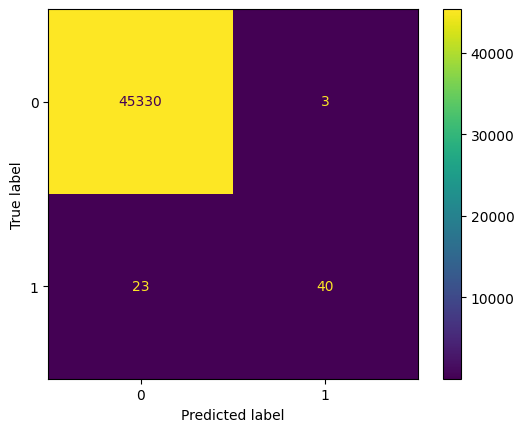

In [ ]:
visualize_results(Y_val_fs,cnn_fs_val_preds)